### Load eval

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def peak_index(group, x_index, y_index):
    max_x, max_y = 0, -1

    for id_label, _ in group.iterrows():
        try:
            if group.at[id_label , y_index] is not None:
                if isinstance(group.at[id_label , y_index], pd.core.series.Series):
                    if len(group.at[id_label , y_index]) > 1:
                        new_v = group.at[id_label , y_index].iloc[0].item()
                    if len(group.at[id_label , y_index]) == 0:
                        continue
                else:
                    new_v = group.at[id_label , y_index]
#                 print(new_v)
                if new_v > max_y:
                    max_y = new_v
                    max_x = group.at[id_label , x_index]
        except Exception as e:
            print(group.at[id_label , y_index])
            print(type(group.at[id_label , y_index]))
            print(isinstance(group.at[id_label , y_index], pd.core.series.Series))
            print(len(group.at[id_label , y_index]))
            raise e
            
    return max_x, max_y

def plot_testing_curve(df, y_index, title=''):
    peak_box_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.8)
    
    fig, ax = plt.subplots(figsize=(16,5))
    for key, grp in df.groupby(['exp_name']): 
        ax = grp.plot(ax=ax, title=title, kind='line', x='step', y=y_index, label=key, style='-o', markersize=8.0, linewidth=4)
        peak_x, peak_y = peak_index(grp, x_index='step', y_index=y_index)
        variance = grp[y_index].var()
        ax.annotate('%s peak=%.3f (@step=%d)' % (key, peak_y, peak_x), xy=(peak_x, peak_y), textcoords='data', size=8, bbox=peak_box_props)
#         display(grp)
#         break

    plt.legend(loc='best')
    plt.show()



### Load all .eval

In [7]:
# fulldata
# report_dir = '/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_o2s_fulldata/report/'

# TF-fewshot
# report_dir = '/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_DA/report/'
# report_dir = '/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot/report/'
report_dir = '/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/report'

# BART-fewshot
# report_dir = '/zfs1/hdaqing/rum20/kp/transfer_exps/kp_bart_DA/report/'
# report_dir = '/zfs1/hdaqing/rum20/kp/transfer_exps/kp_fewshot-v1-DA1e6_FT1e5/report/'
# report_dir = '/zfs1/hdaqing/rum20/kp/transfer_exps/kp_fewshot-v2/report/'
# report_dir = '/zfs1/hdaqing/rum20/kp/transfer_exps/kp_fewshot-v3/report/'

# BART-mag
# report_dir = '/zfs1/hdaqing/rum20/kp/transfer_exps/kp_mag_fewshot/report/'

pred_name = 'beamsearch-width_50-maxlen_40'

all_eval_df = None
for fname in os.listdir(report_dir):
    if not fname.endswith('.split_nopunc.csv'): continue
    df = pd.read_csv(os.path.join(report_dir, fname))
    df = df.loc[df.pred_name == pred_name]
    df = df.sort_values(by='step', ascending=True)

    all_eval_df = df if all_eval_df is None else pd.concat([all_eval_df, df], sort=True)


In [8]:
print(len(all_eval_df))
print(all_eval_df.test_dataset.unique())
print(all_eval_df.exp_name.unique())
print(all_eval_df.test_dataset.unique())

1060
['kptimes_valid2k_test' 'stackex_valid2k_test' 'openkp_valid2k_test'
 'kp20k_valid2k_test']
['transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot100_step1k_lr1e5'
 'transformer-kptimes-PT_step200k-FT_fewshot100_step1k_lr1e5'
 'transformer-kptimes-PT_step200k-FT_fewshot100_step2k_lr1e5'
 'transformer-kptimes-PT_step200k-FT_fewshot1k_step2k_lr1e5'
 'transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot100_step2k_lr1e5'
 'transformer-kptimes-PT_step200k-FT_fewshot1k_step4k_lr1e5'
 'transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot1k_step2k_lr1e5'
 'transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot1k_step4k_lr1e5'
 'transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot10k_step4k_lr1e5'
 'transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot10k_step8k_lr1e5'
 'transformer-kptimes-PT_step200k-FT_fewshot10k_step4k_lr1e5'
 'transformer-kptimes-PT_step200k-FT_fewshot10k_step8k_lr1e5'
 'transformer-stackex-PT_step200k-DA_step20k-FT_fewshot100_step1k_lr1e5'
 'transformer-stackex-PT

1060
transformer-kp20k-PT_step200k-DA_step10k_100k-FT_fewshot1k_step2k_lr1e5 19
transformer-kp20k-PT_step200k-DA_step10k_20k-FT_fewshot1k_step2k_lr1e5 18
transformer-kp20k-PT_step200k-DA_step15k_20k-FT_fewshot1k_step2k_lr1e5 20
transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot100_step1k_lr1e5 20
transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step100k_lr1e5_warmup5k 20
transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step100k_lr5e5_warmup10k 20
transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step20k_lr1e5_warmup2k 20
transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step4k_lr1e5 20
transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step50k_lr1e4_warmup5k 20
transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot1k_step2k_lr1e5 20
transformer-kp20k-PT_step200k-DA_step20k-FT_full_step100k_lr1e5_warmup5k 20
transformer-kp20k-PT_step200k-DA_step20k-FT_full_step100k_lr5e5_warmup10k 20
transformer-kp20k-PT_step200k-DA_step20k-FT_full_step20k_lr1e5_warmup2k 20
trans

/ihome/hdaqing/rum20/anaconda3/envs/kp/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr5e5 20
transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr5e6 20
transformer-kp20k-PT_step200k-FT_fewshot10k_step4k_lr1e5 20
transformer-kp20k-PT_step200k-FT_fewshot1k_step2k_lr1e5 20
transformer-kp20k-PT_step200k-FT_full_step20k-lr1e5-warmup2k 20
transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot100_step1k_lr1e5 20
transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot100_step2k_lr1e5 20
transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot10k_step4k_lr1e5 20
transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot10k_step8k_lr1e5 30
transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot1k_step2k_lr1e5 20
transformer-kptimes-PT_step200k-DA_step20k-FT_fewshot1k_step4k_lr1e5 20
transformer-kptimes-PT_step200k-FT_fewshot100_step1k_lr1e5 20
transformer-kptimes-PT_step200k-FT_fewshot100_step2k_lr1e5 20
transformer-kptimes-PT_step200k-FT_fewshot10k_step4k_lr1e5 20
transformer-kptimes-PT_step200k-FT_fewshot10k_step8k_lr1e5 34
transformer-k

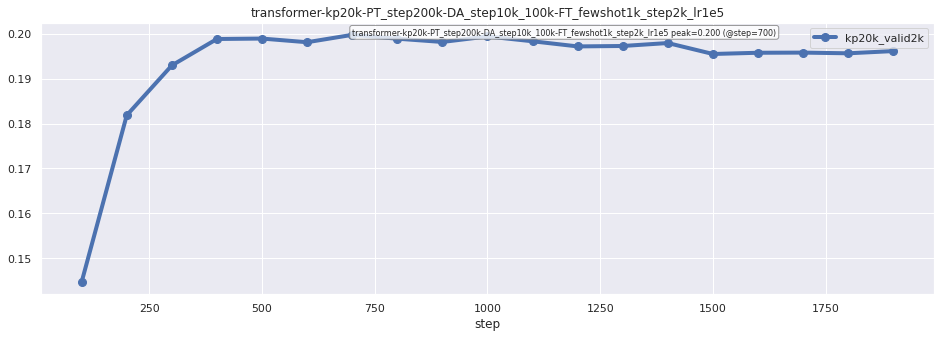

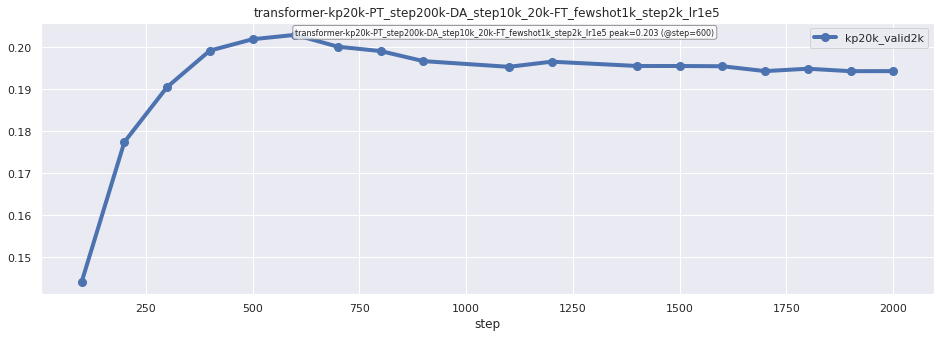

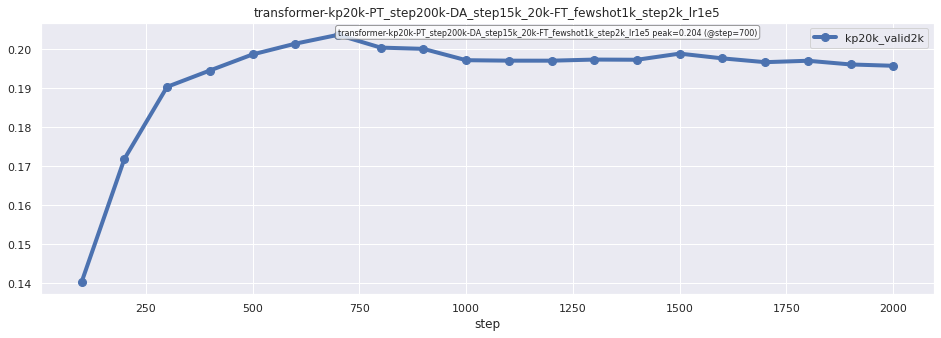

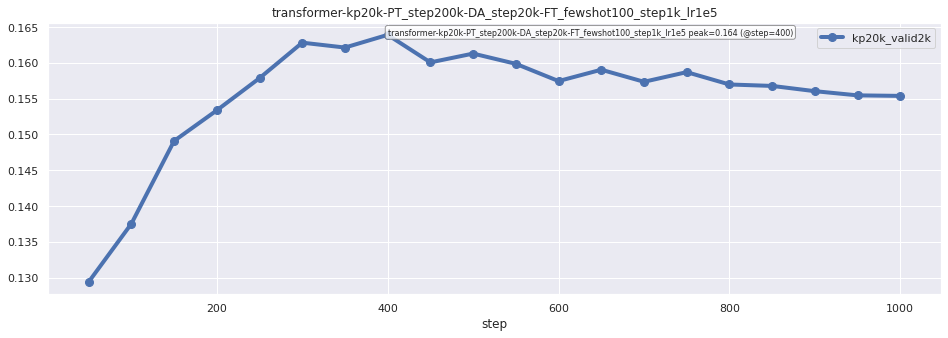

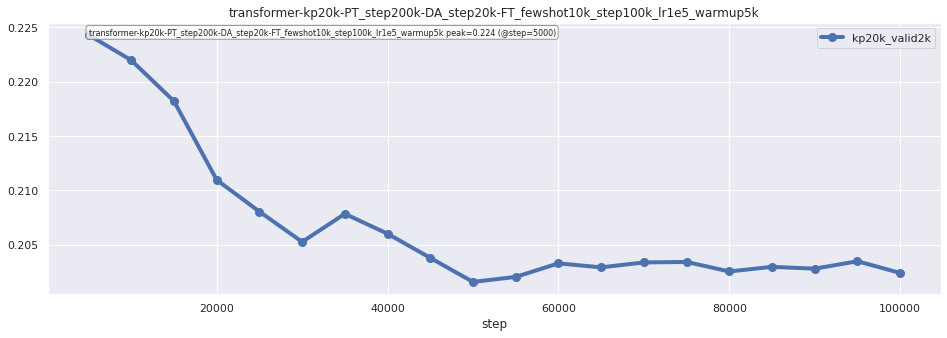

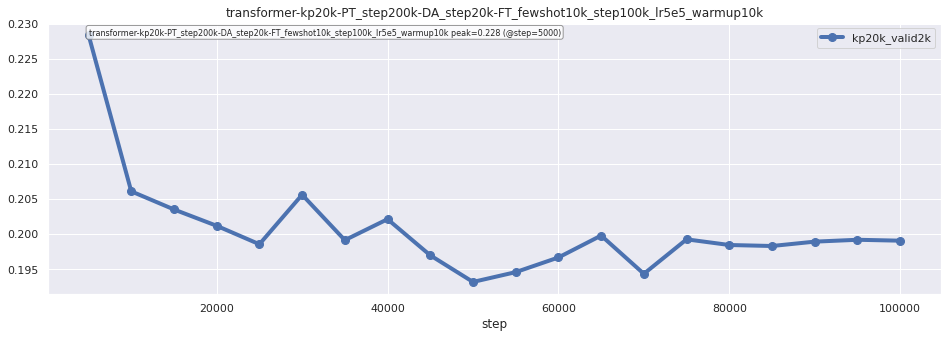

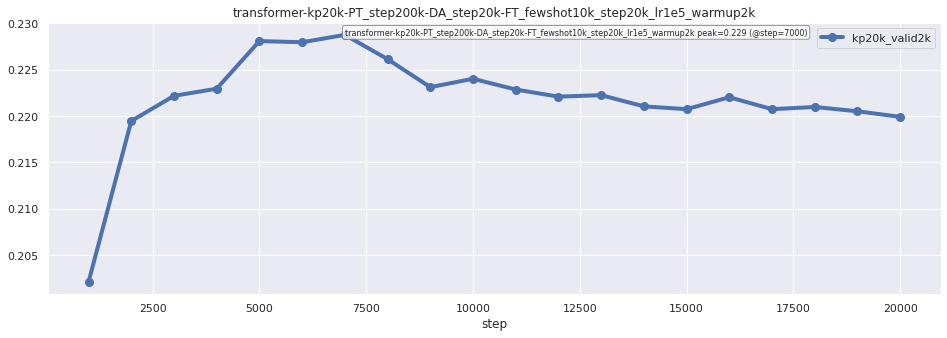

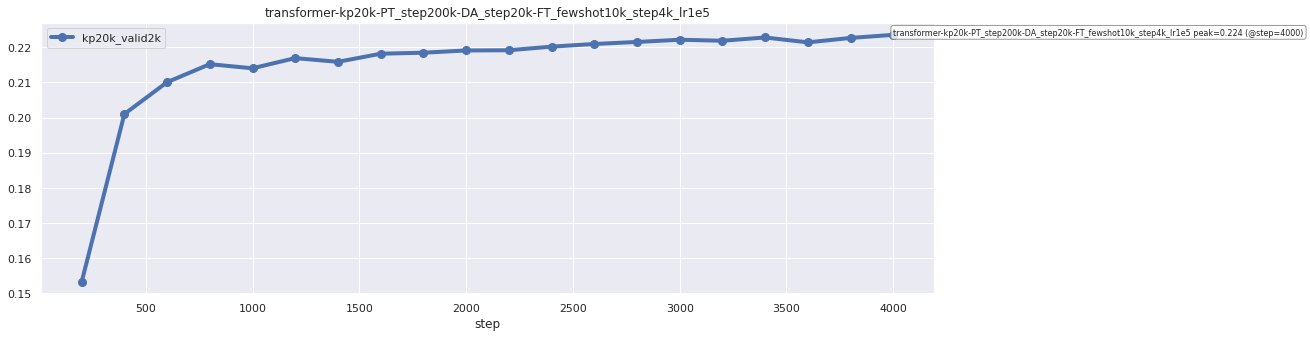

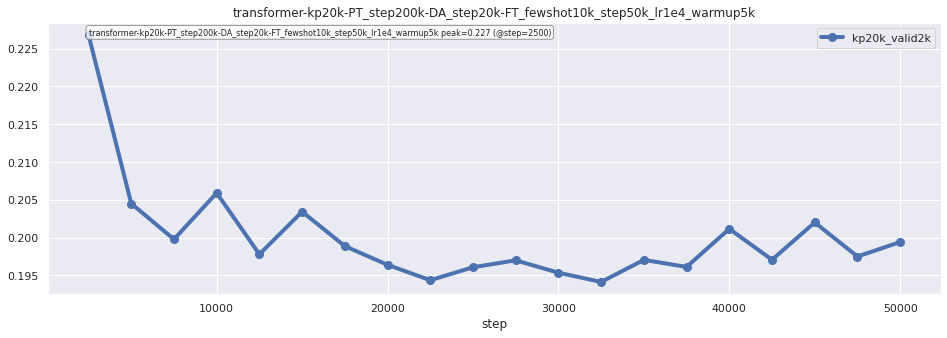

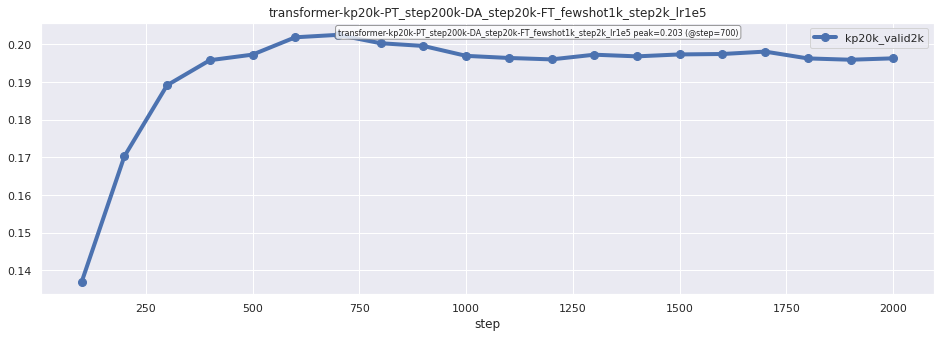

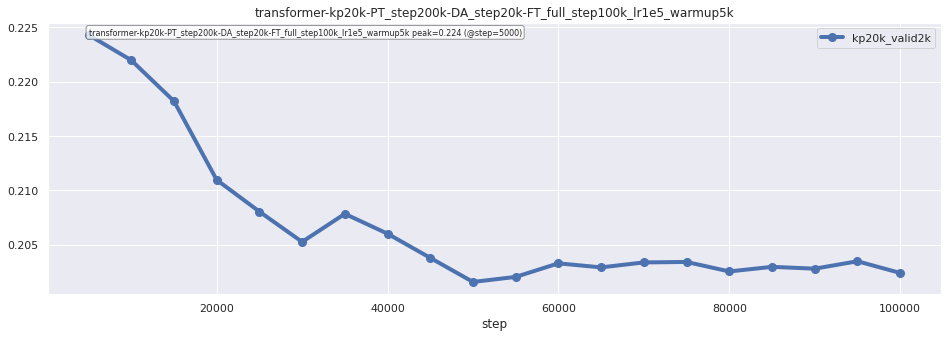

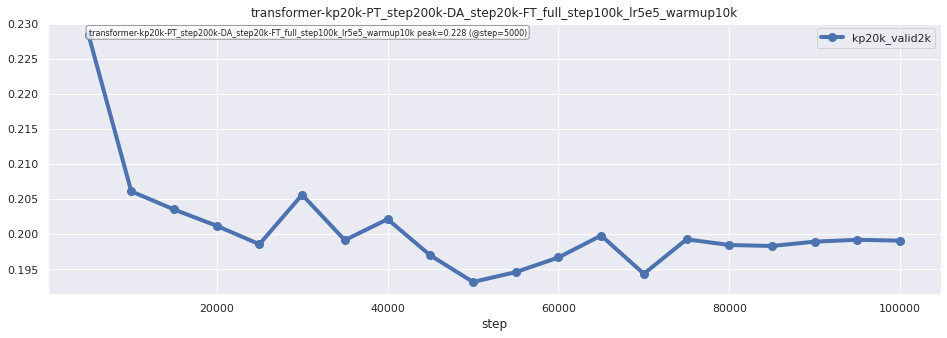

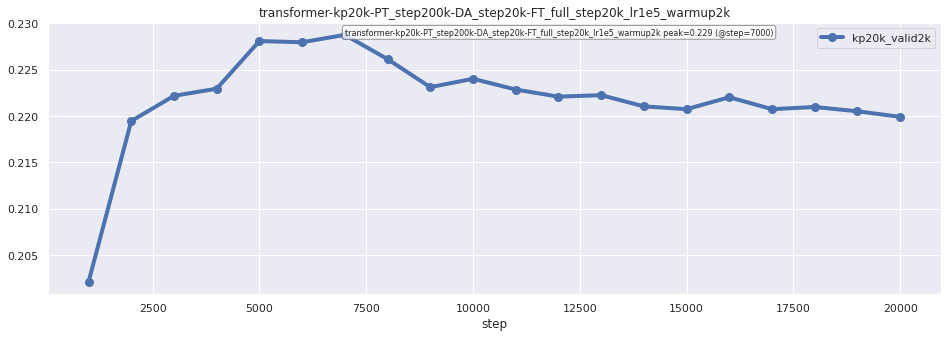

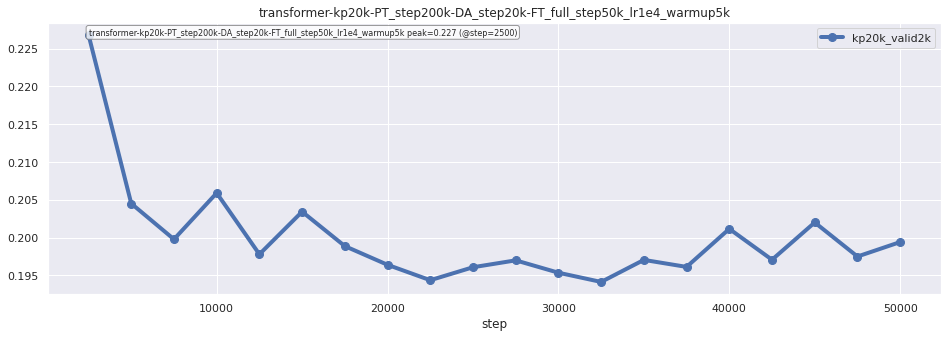

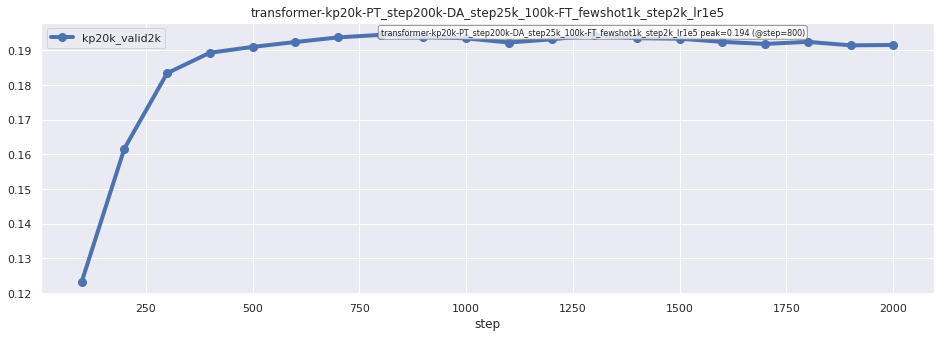

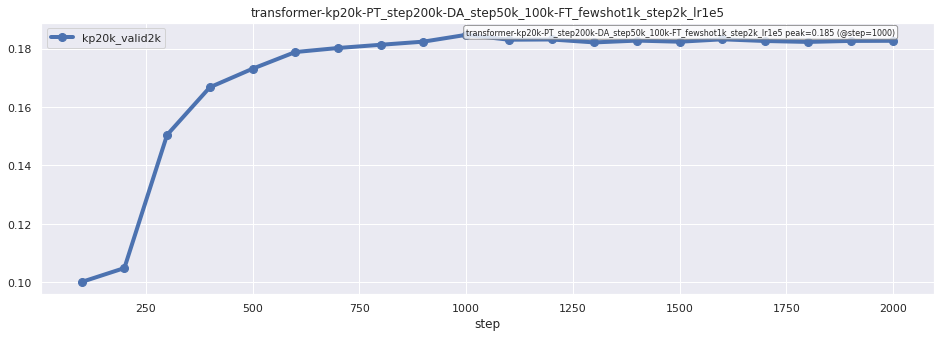

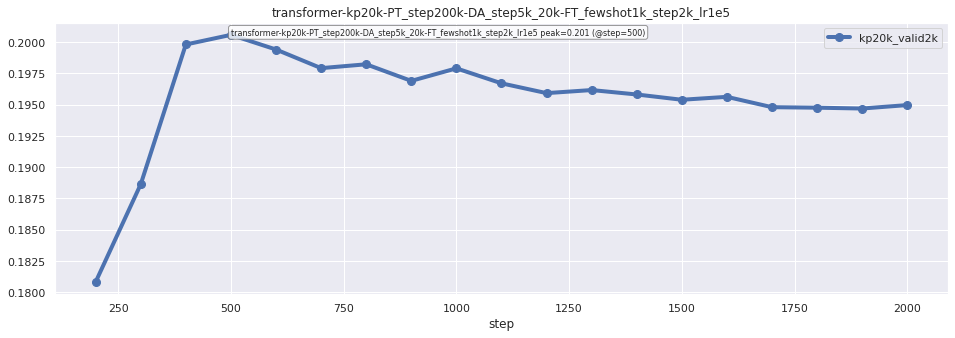

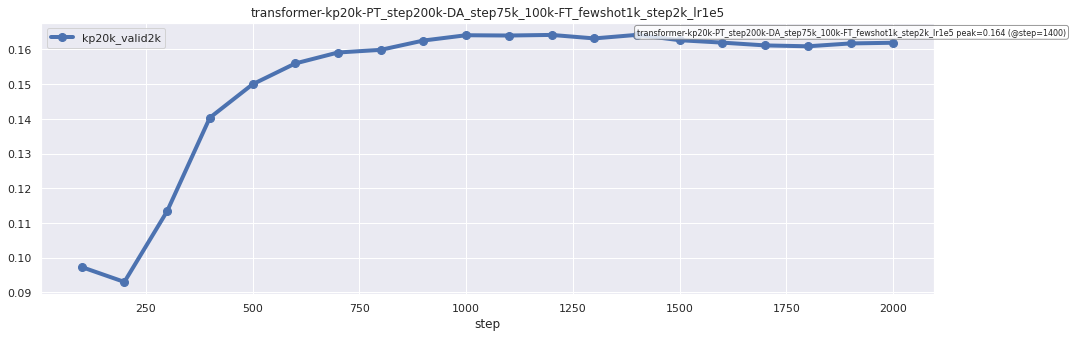

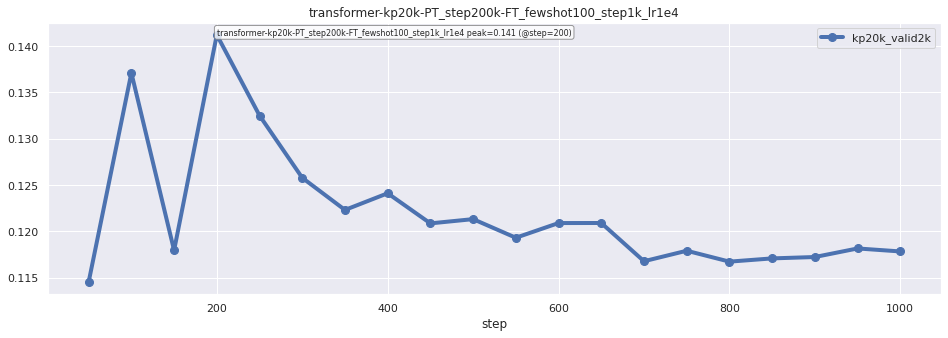

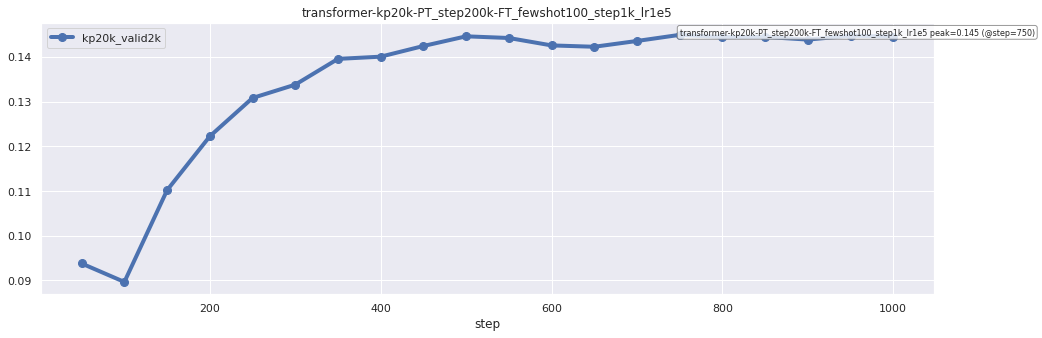

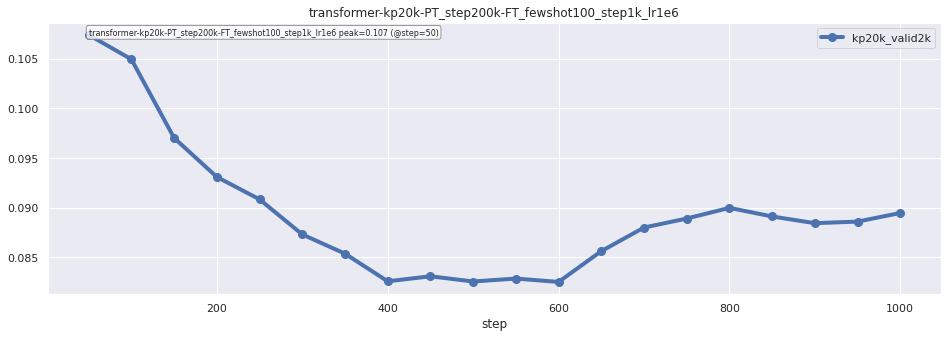

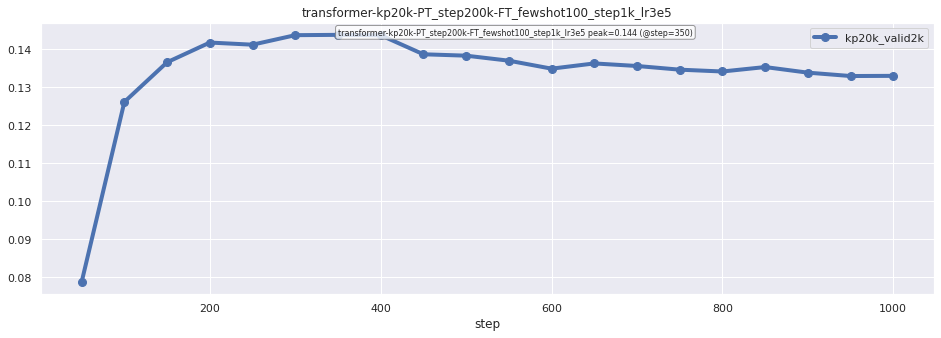

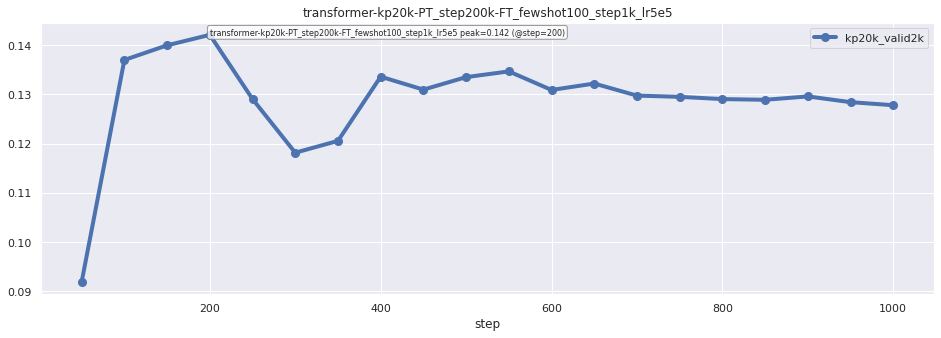

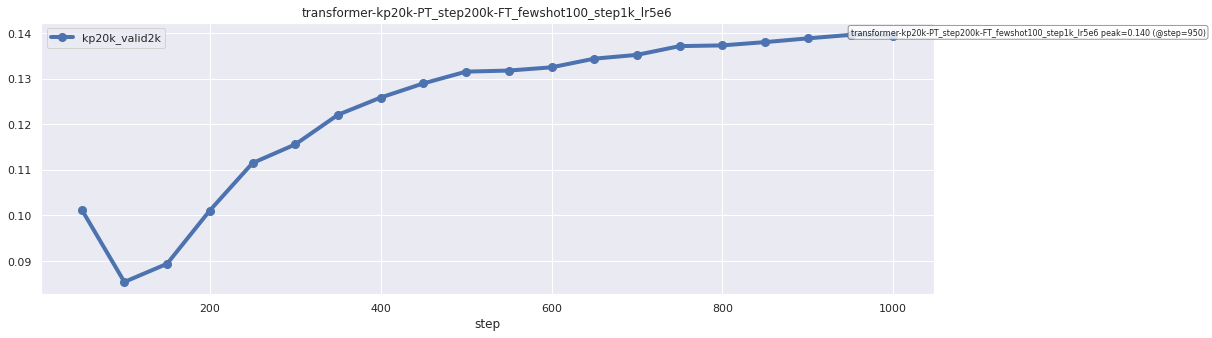

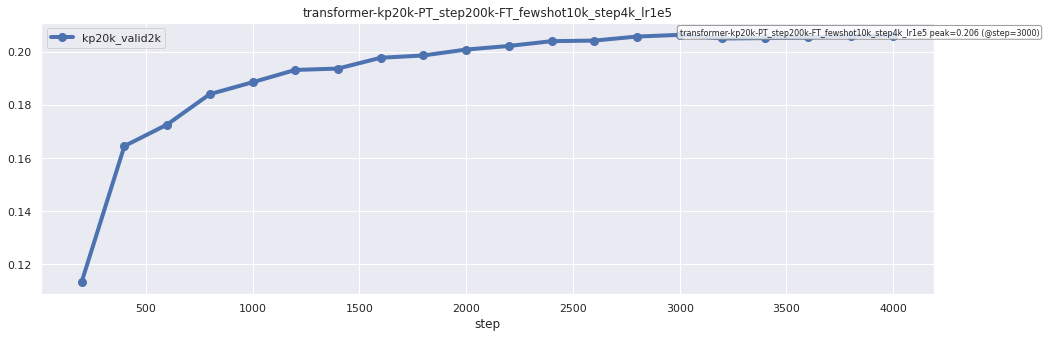

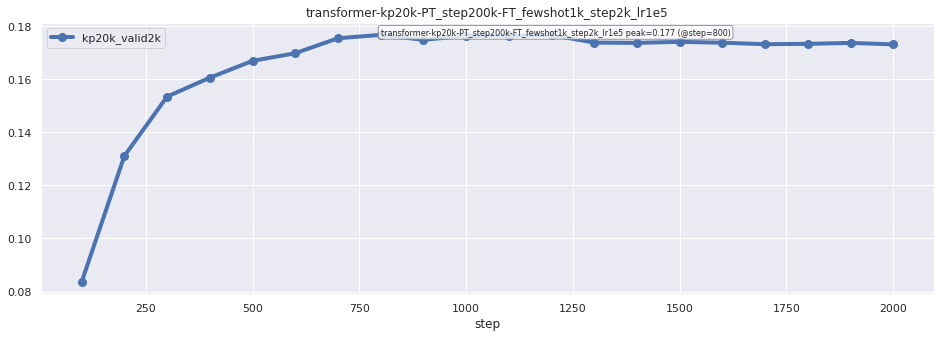

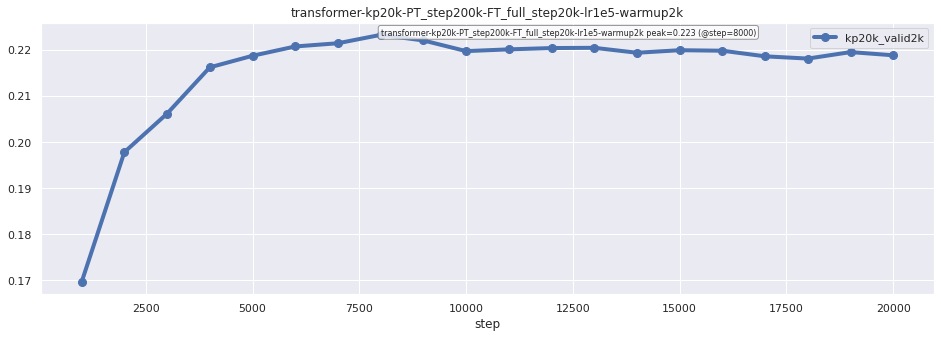

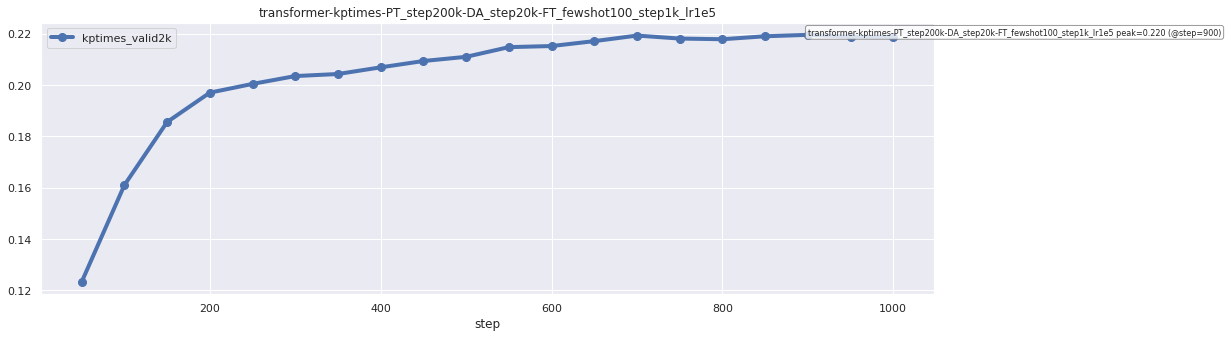

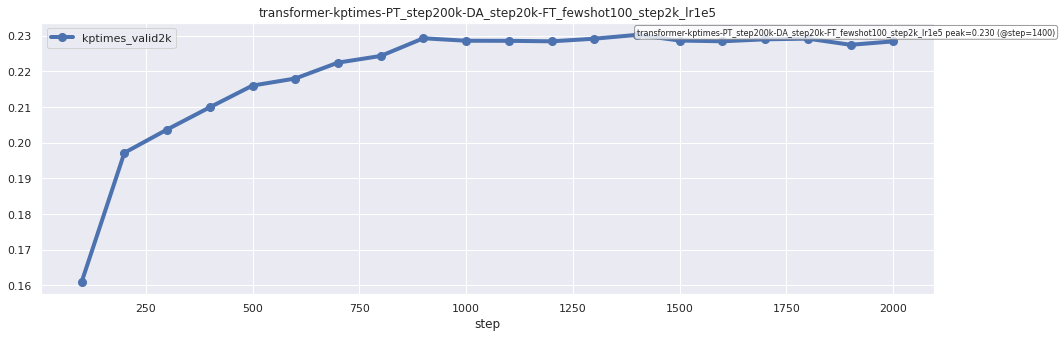

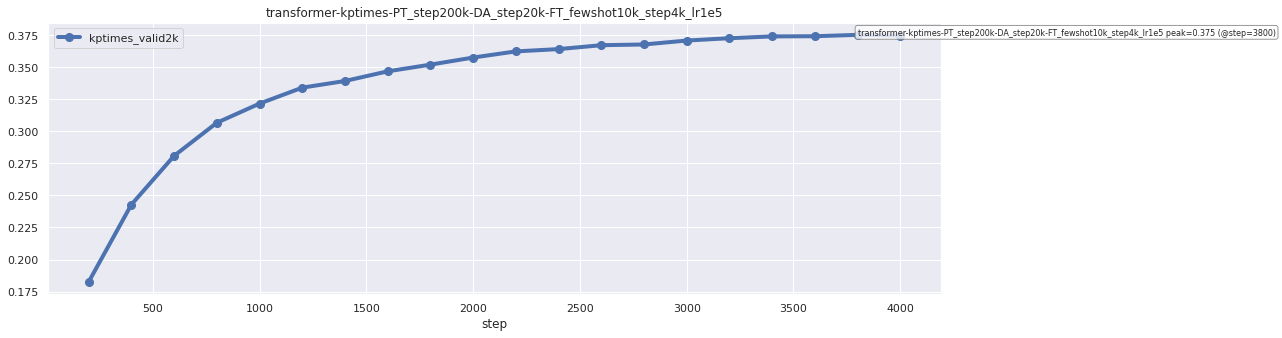

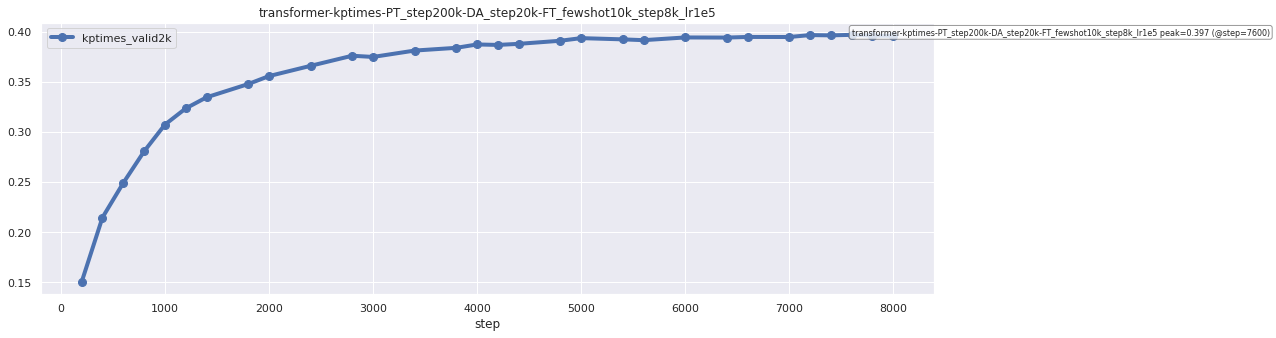

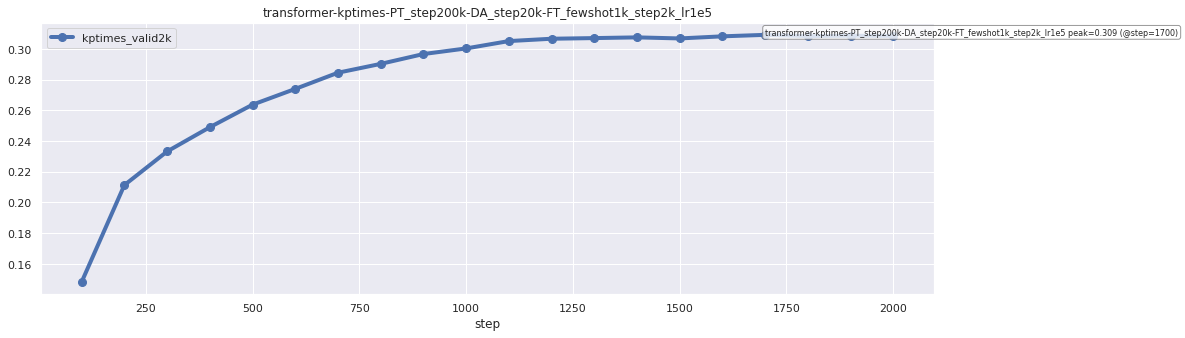

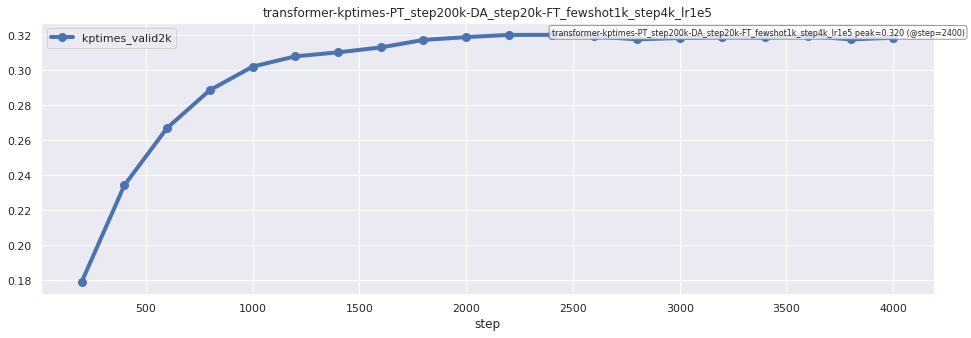

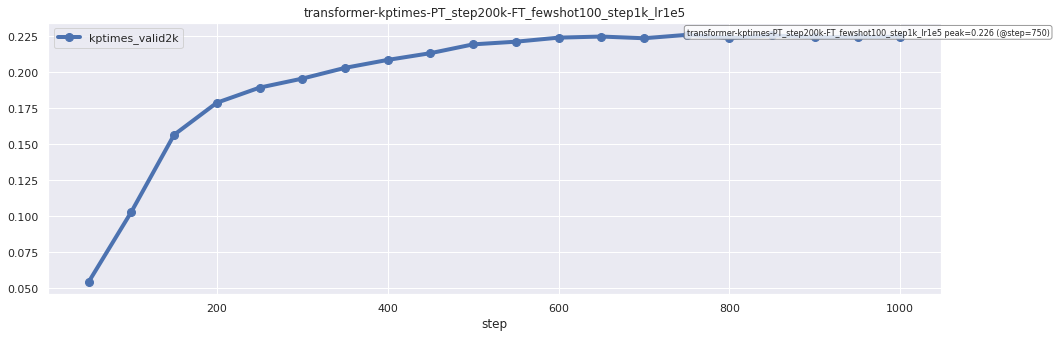

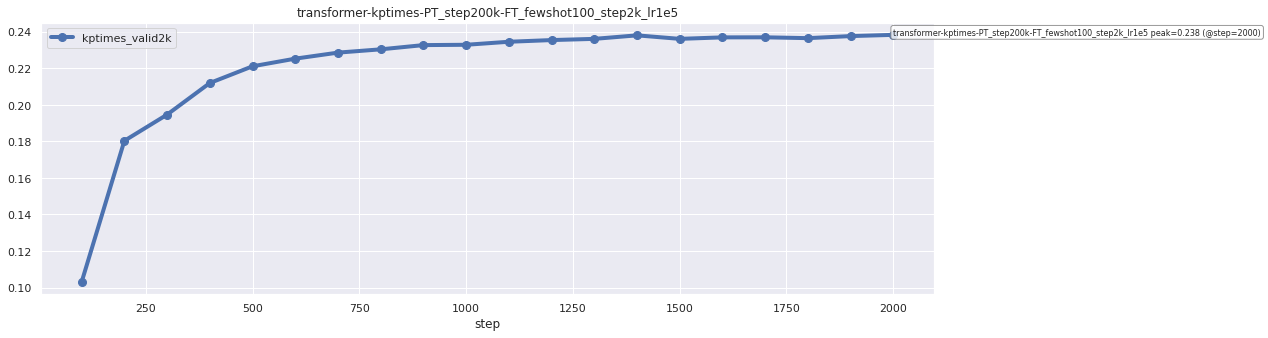

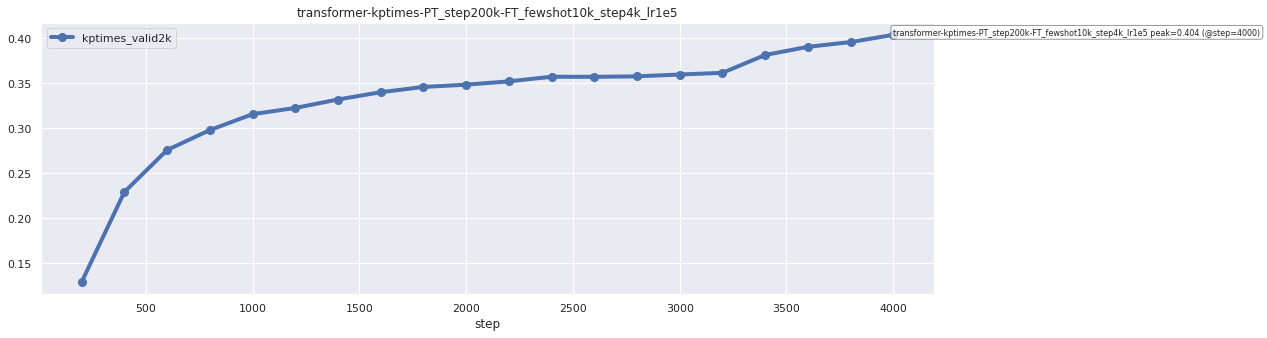

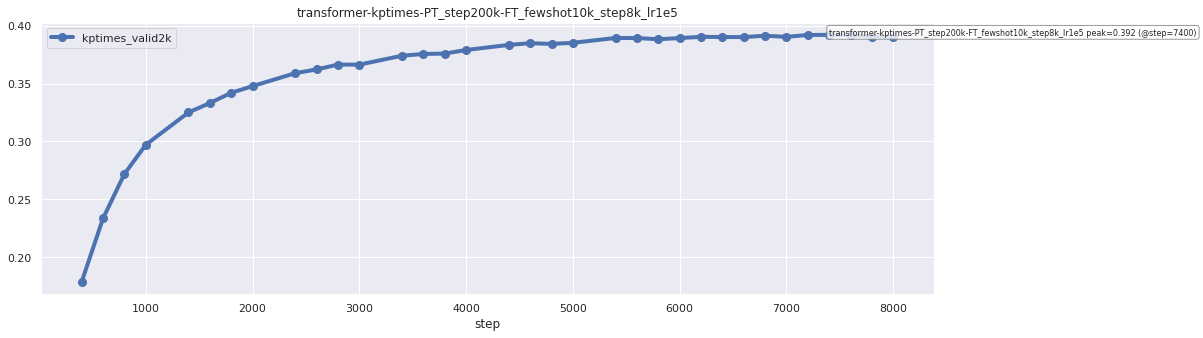

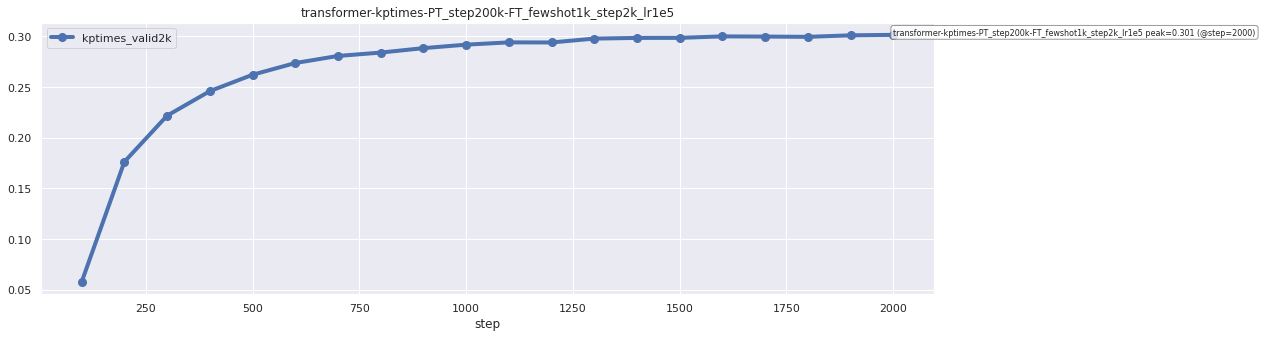

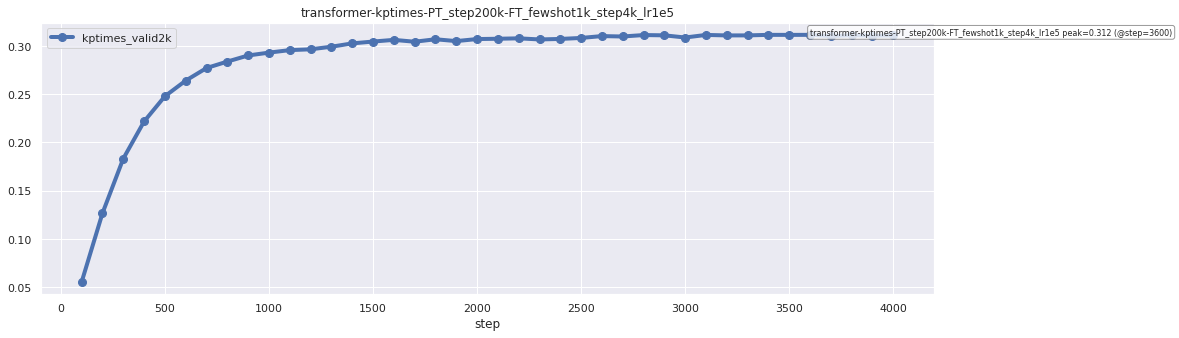

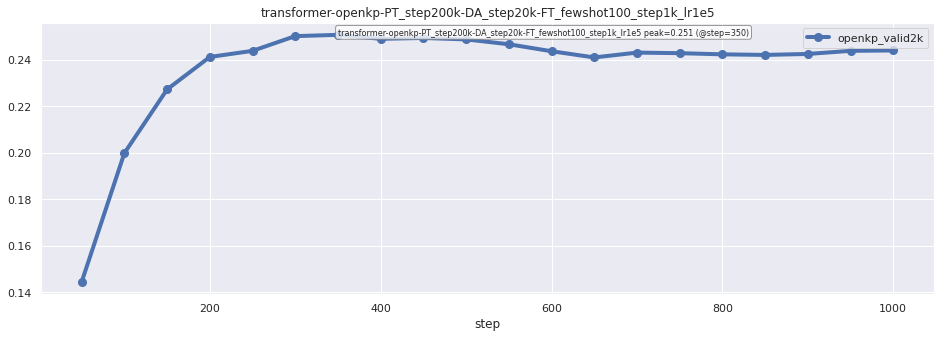

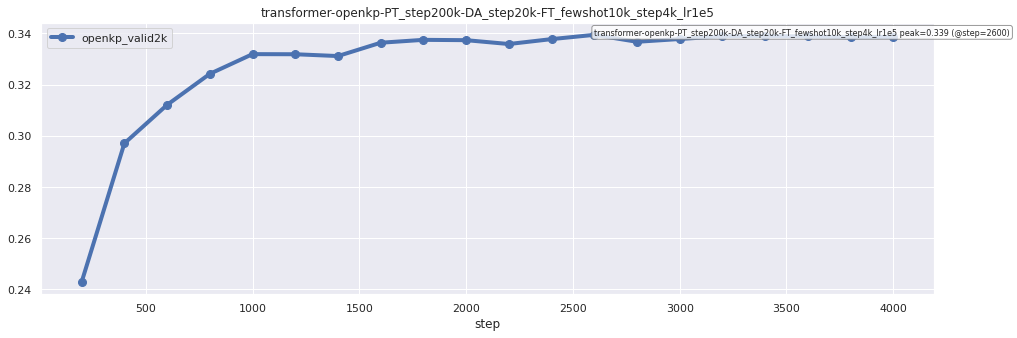

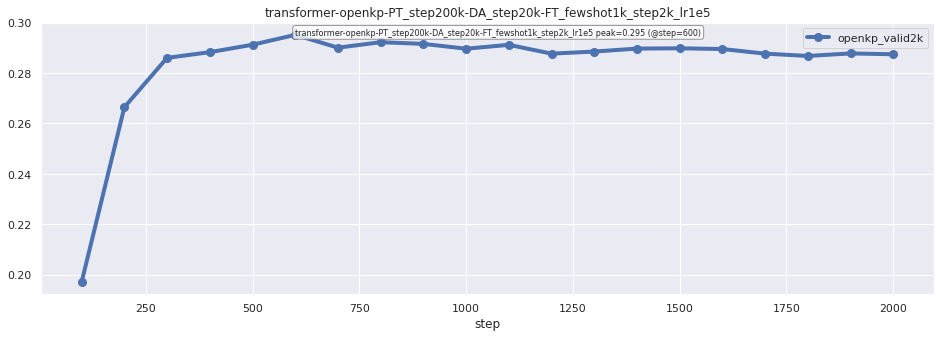

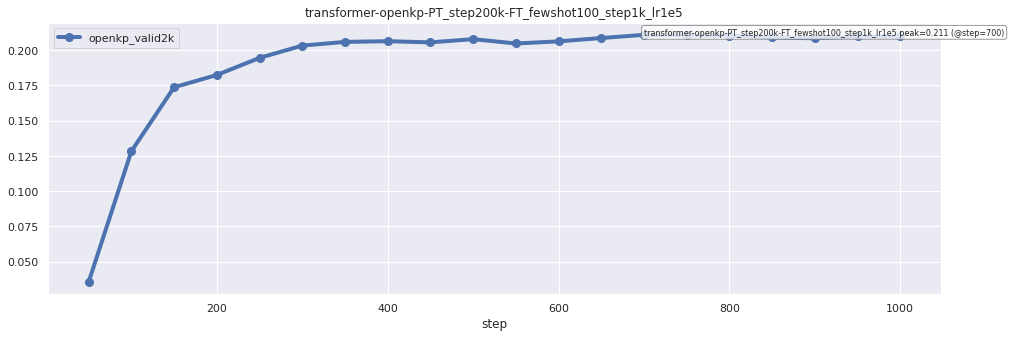

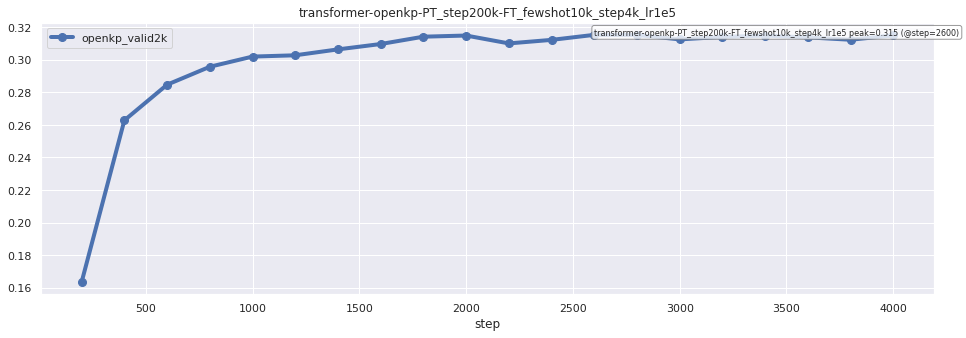

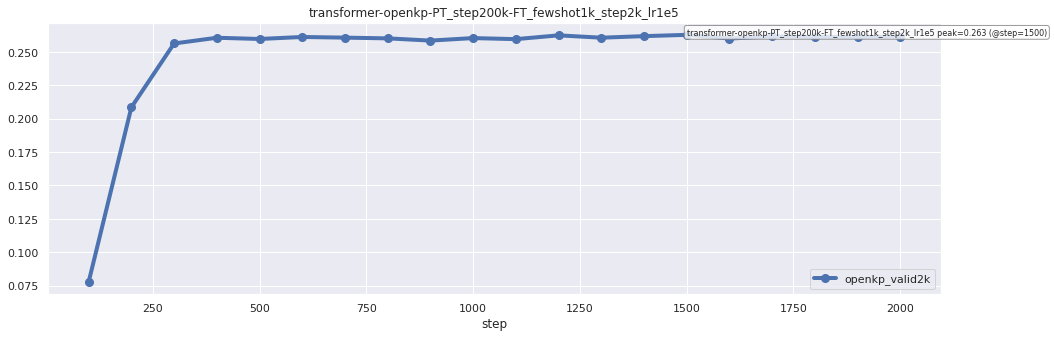

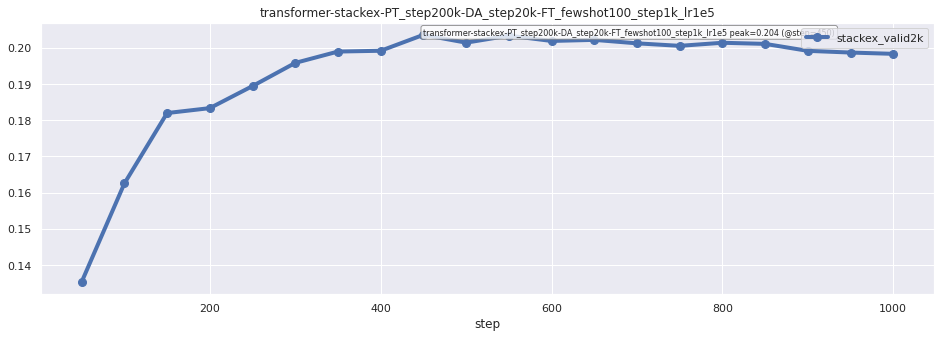

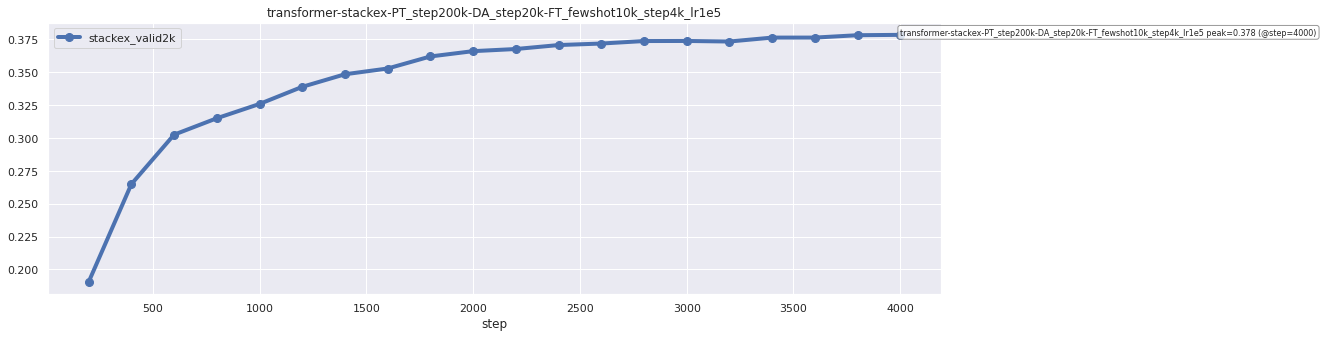

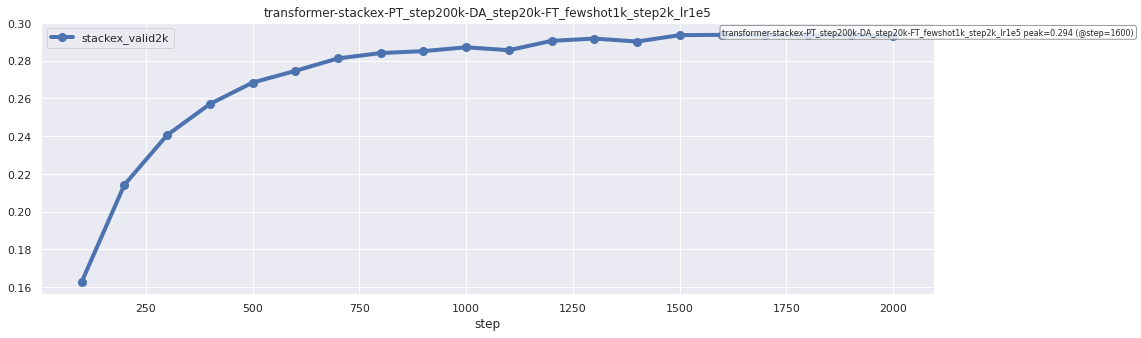

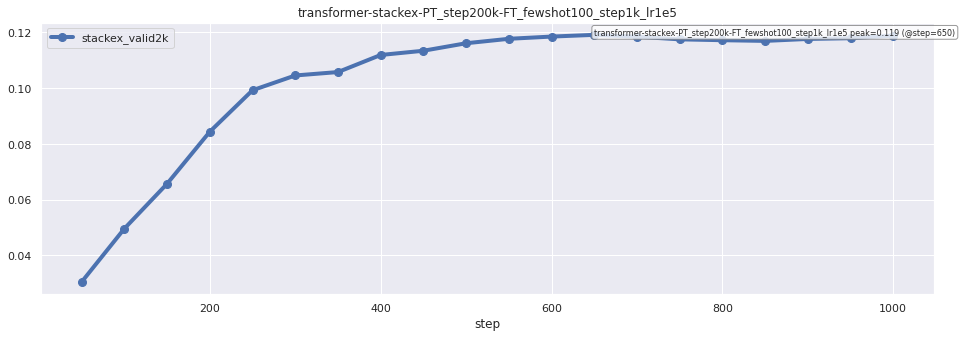

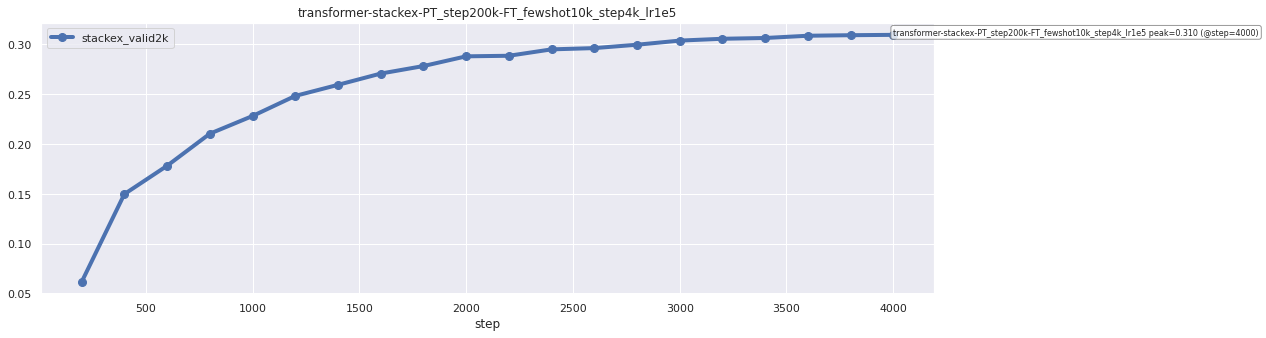

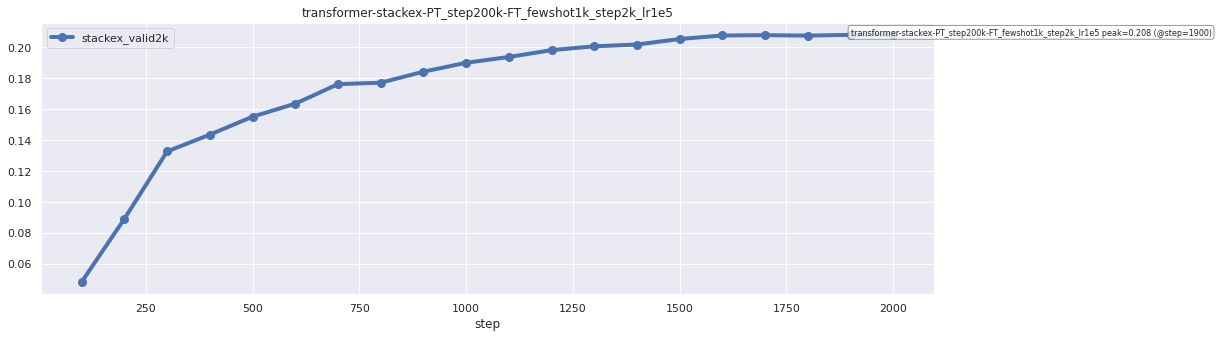

In [9]:
# short2long = {
# 'BART-KP20k': 'bartFT_presabs_kp20k_100k_rerun',
# 'BART-OpenKP': 'bartFT_presabs_openkp_100k_rerun',
# 'BART-KPTimes': 'bartFT_presabs_kptimes_100k_rerun',
# 'BART-StackEx': 'bartFT_presabs_stackex_100k_rerun',

# 'TF-KP20k': 'transformer_presabs_kp20k',
# 'TF-OpenKP': 'transformer_presabs_openkp',
# 'TF-KPTimes': 'transformer_presabs_kptimes',
# 'TF-StackEx': 'transformer_presabs_stackex'
# }
# long2short = {long: short for short, long in short2long.items()}

long2short = {n: n for n in sorted(all_eval_df.exp_name.unique())}
datasets = ['kp20k_valid2k_test', 'kptimes_valid2k_test', 'openkp_valid2k_test', 'stackex_valid2k_test']

anchor_metric_name = 'all_exact_f_score@k'
peak_box_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.8)

kp_df = all_eval_df.loc[all_eval_df['exp_name'].isin(long2short)]
# kp_df = kp_df.loc[(kp_df.step % 10000 == 0)]
kp_df = kp_df.sort_values(by='step', ascending=True)

print(len(kp_df))


for exp_name, exp_grp in kp_df.groupby(['exp_name']):
    print(exp_name, len(exp_grp))
    fig, ax = plt.subplots(figsize=(16,5))
    exp_grp = exp_grp.loc[exp_grp['test_dataset'].isin(datasets)]

    for test_dataset, data_grp in exp_grp.groupby(['test_dataset']): 
        data_grp = data_grp.drop_duplicates()
#         print(test_dataset, len(data_grp))
        peak_x, peak_y = peak_index(data_grp, x_index='step', y_index=anchor_metric_name)
        
        ax.annotate('%s peak=%.3f (@step=%d)' % (exp_name, peak_y, peak_x), xy=(peak_x, peak_y), textcoords='data', size=8, bbox=peak_box_props)
        ax = data_grp.plot(ax=ax, kind='line', x='step', y=anchor_metric_name, title=exp_name, label=test_dataset[:-5], style='-o', markersize=8.0, linewidth=4)


### Plot each exp

536
536
transformer-kp20k-PT_step200k-DA_step10k_100k-FT_fewshot1k_step2k_lr1e5 19
kp20k_valid2k_test 19


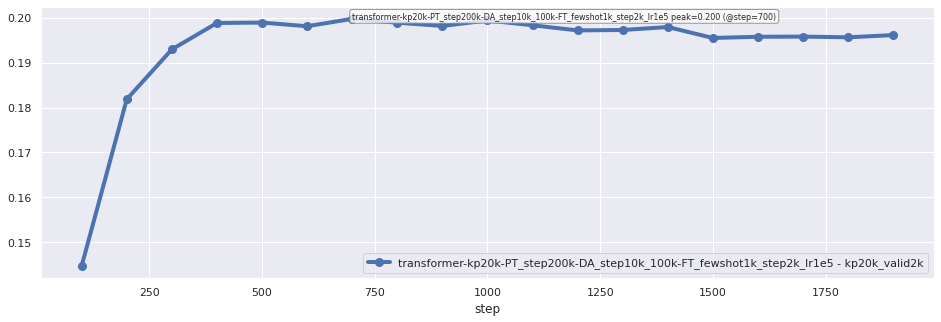

transformer-kp20k-PT_step200k-DA_step10k_20k-FT_fewshot1k_step2k_lr1e5 18
kp20k_valid2k_test 18


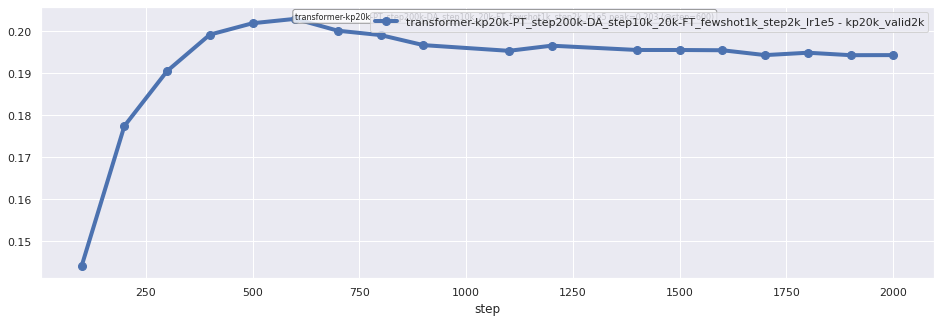

transformer-kp20k-PT_step200k-DA_step15k_20k-FT_fewshot1k_step2k_lr1e5 20
kp20k_valid2k_test 20


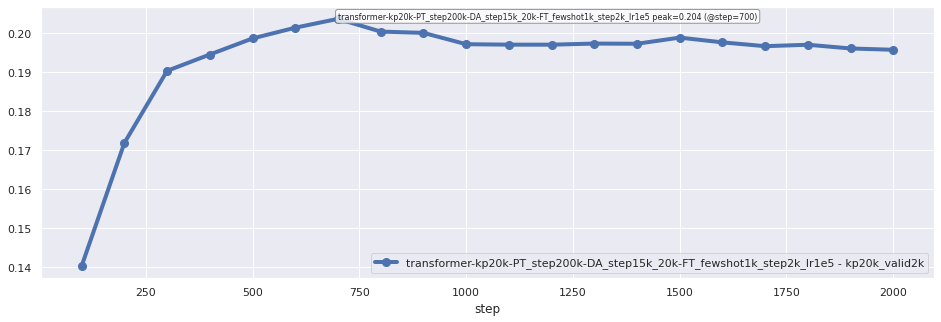

transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot100_step1k_lr1e5 20
kp20k_valid2k_test 20


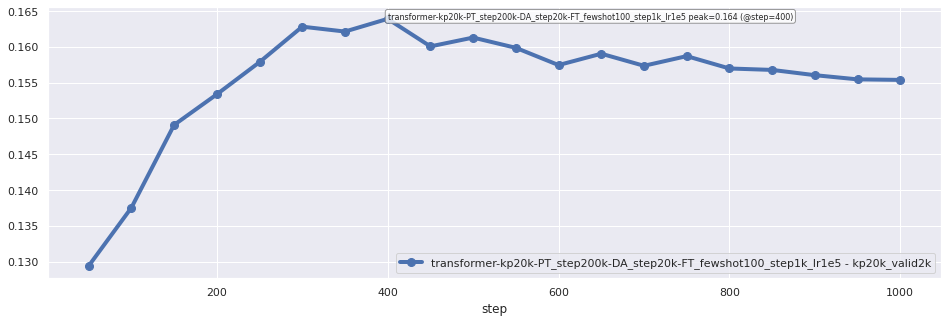

transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step100k_lr1e5_warmup5k 20
kp20k_valid2k_test 20


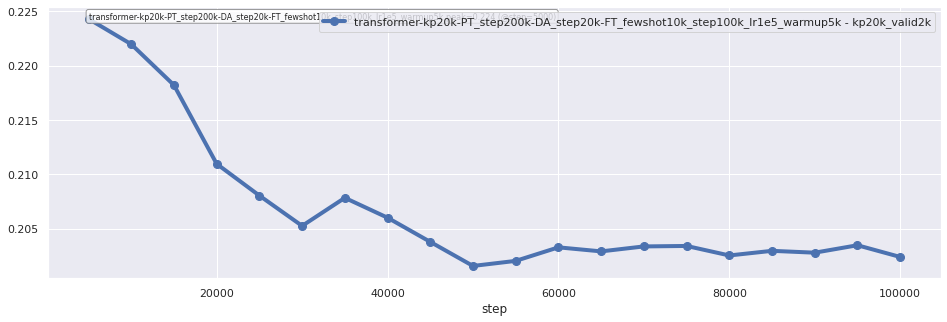

transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step100k_lr5e5_warmup10k 20
kp20k_valid2k_test 20


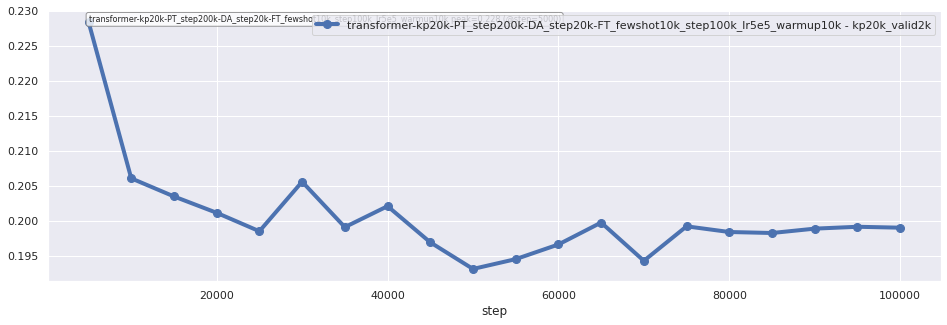

transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step20k_lr1e5_warmup2k 20
kp20k_valid2k_test 20


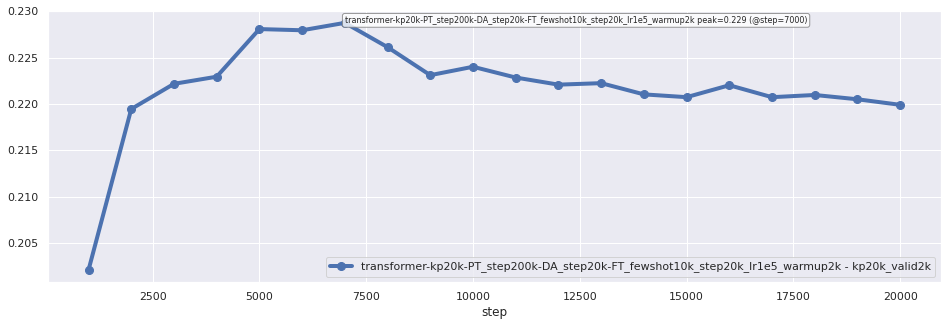

transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step4k_lr1e5 20
kp20k_valid2k_test 20


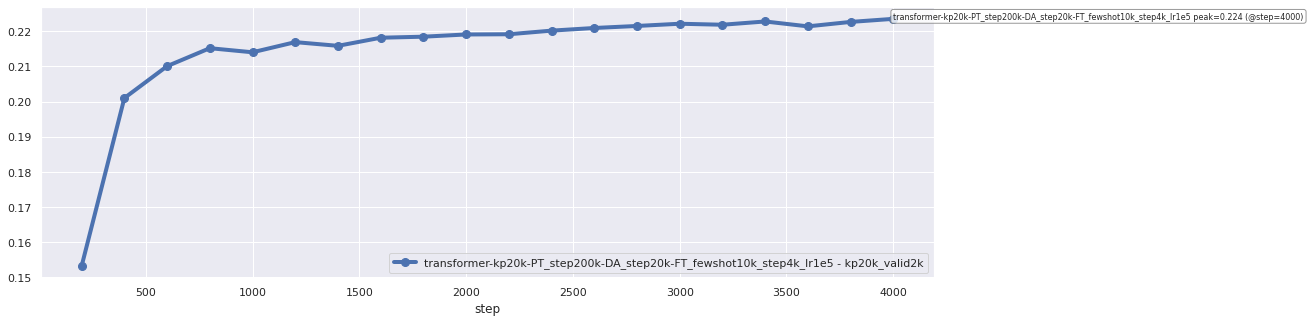

transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot10k_step50k_lr1e4_warmup5k 20
kp20k_valid2k_test 20


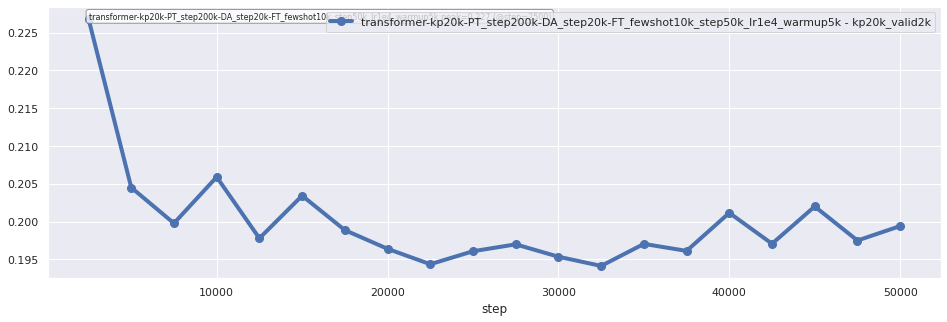

transformer-kp20k-PT_step200k-DA_step20k-FT_fewshot1k_step2k_lr1e5 20
kp20k_valid2k_test 20


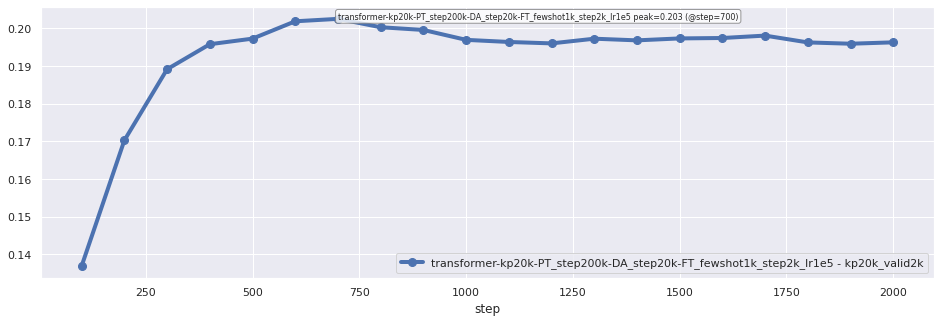

transformer-kp20k-PT_step200k-DA_step20k-FT_full_step100k_lr1e5_warmup5k 20
kp20k_valid2k_test 20


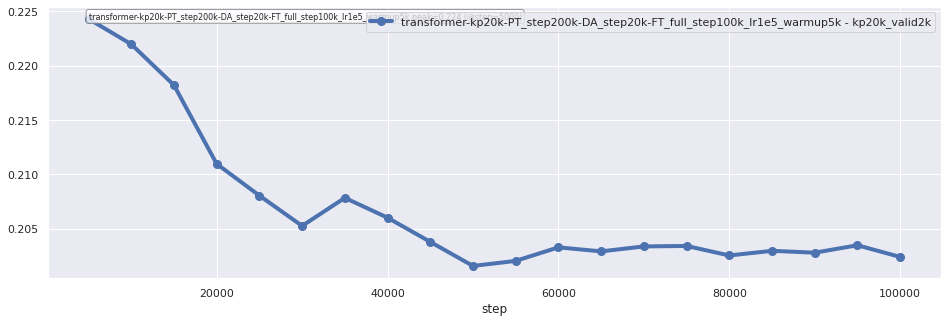

transformer-kp20k-PT_step200k-DA_step20k-FT_full_step100k_lr5e5_warmup10k 20
kp20k_valid2k_test 20


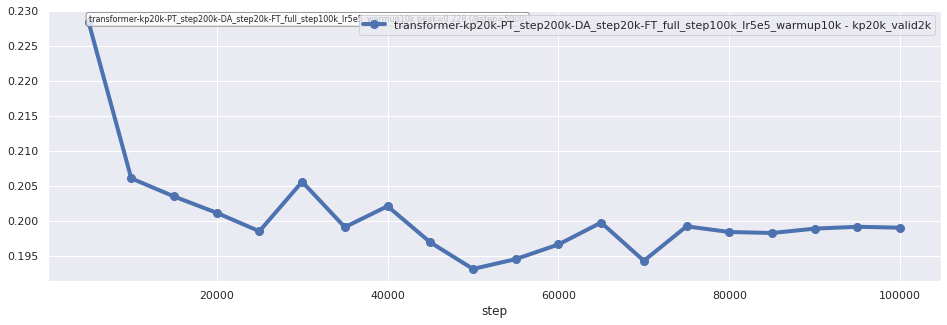

transformer-kp20k-PT_step200k-DA_step20k-FT_full_step20k_lr1e5_warmup2k 20
kp20k_valid2k_test 20


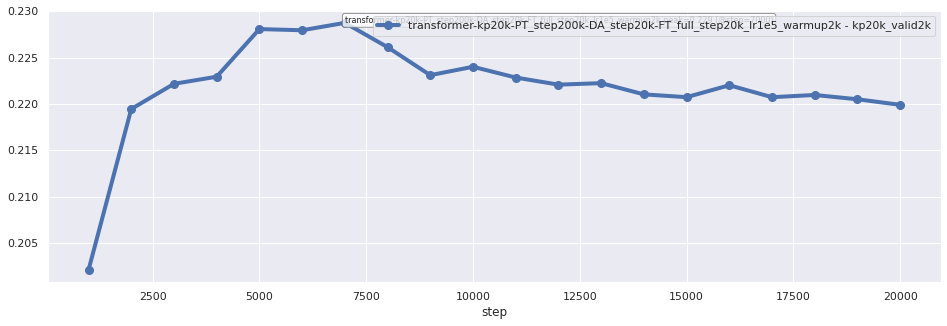

transformer-kp20k-PT_step200k-DA_step20k-FT_full_step50k_lr1e4_warmup5k 20
kp20k_valid2k_test 20


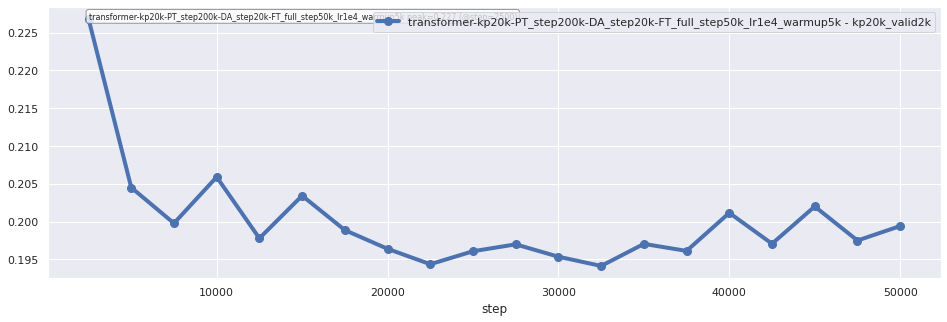

transformer-kp20k-PT_step200k-DA_step25k_100k-FT_fewshot1k_step2k_lr1e5 20
kp20k_valid2k_test 20


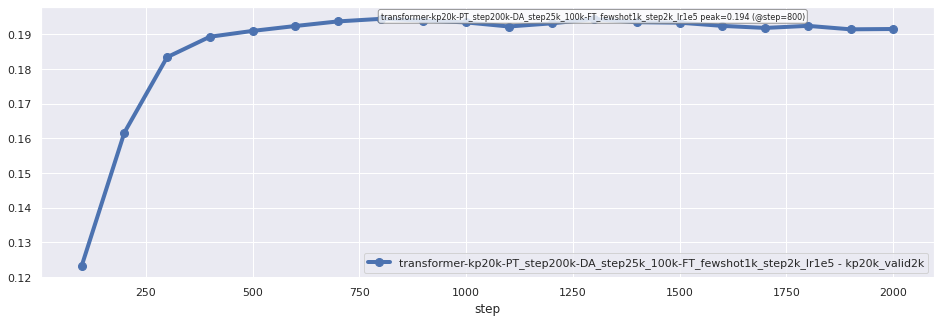

transformer-kp20k-PT_step200k-DA_step50k_100k-FT_fewshot1k_step2k_lr1e5 20
kp20k_valid2k_test 20


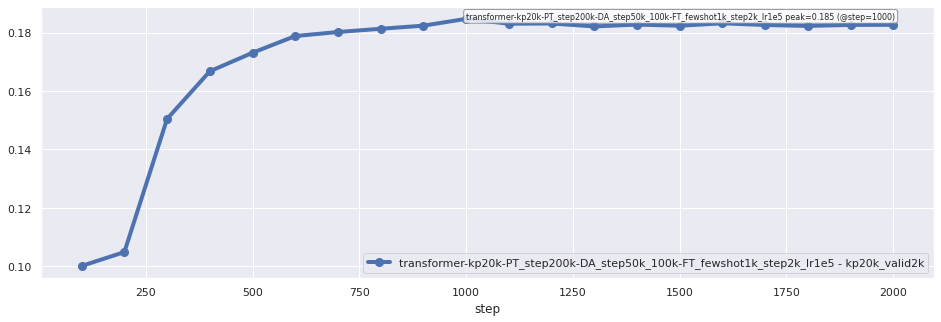

transformer-kp20k-PT_step200k-DA_step5k_20k-FT_fewshot1k_step2k_lr1e5 19
kp20k_valid2k_test 19


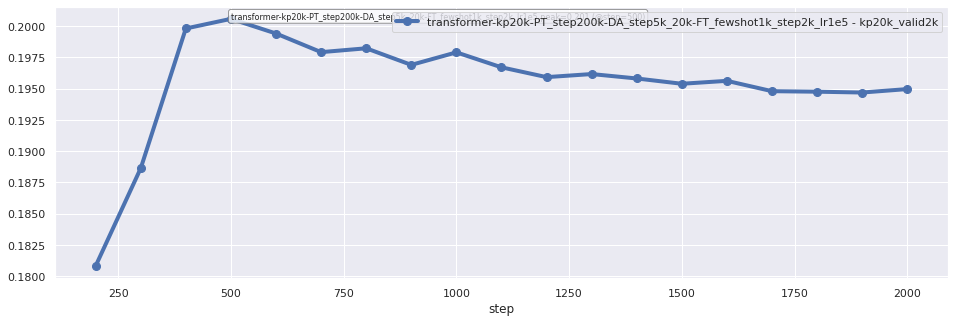

transformer-kp20k-PT_step200k-DA_step75k_100k-FT_fewshot1k_step2k_lr1e5 20
kp20k_valid2k_test 20


336    100
337    200
Name: step, dtype: int64

/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-DA_step75k_100k-FT_fewshot1k_step2k_lr1e5/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_100-data_kp20k_valid2k_test.pred
/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-DA_step75k_100k-FT_fewshot1k_step2k_lr1e5/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_200-data_kp20k_valid2k_test.pred


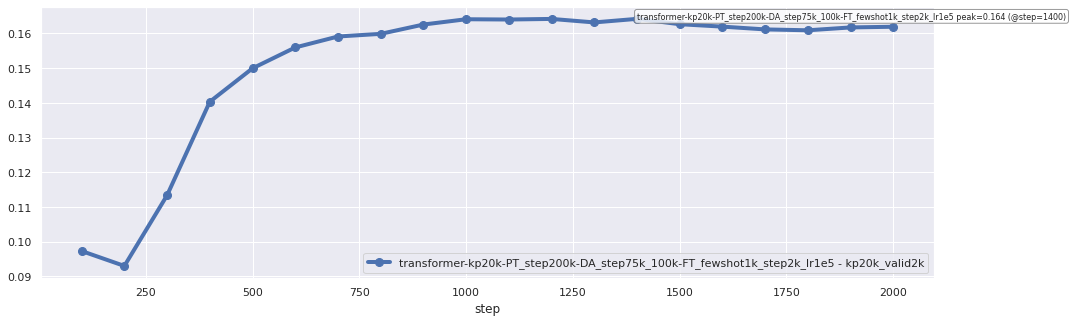

transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e4 20
kp20k_valid2k_test 20


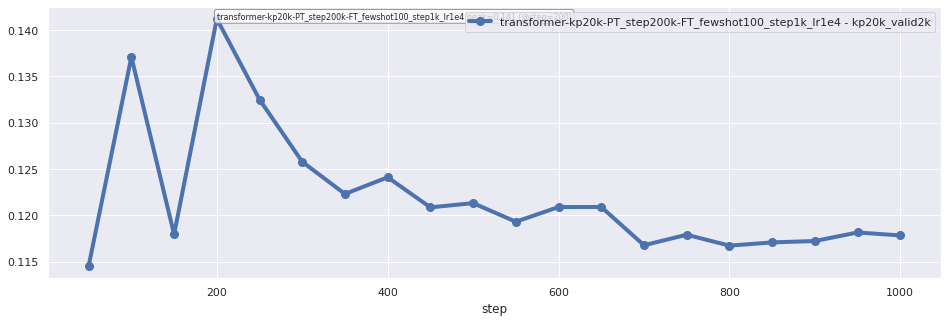

transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e5 20
kp20k_valid2k_test 20


376     50
377    100
Name: step, dtype: int64

/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e5/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_50-data_kp20k_valid2k_test.pred
/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e5/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_100-data_kp20k_valid2k_test.pred


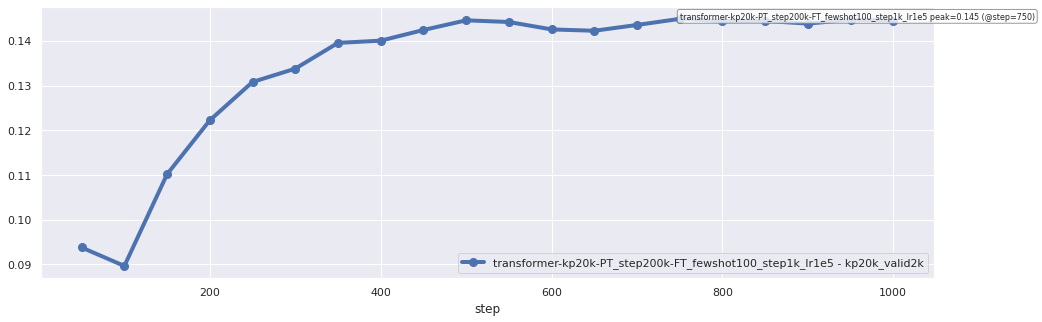

transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e6 20
kp20k_valid2k_test 20


398     150
399     200
400     250
401     300
402     350
403     400
404     450
405     500
406     550
407     600
408     650
409     700
410     750
411     800
412     850
413     900
414     950
415    1000
Name: step, dtype: int64

/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e6/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_150-data_kp20k_valid2k_test.pred
/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e6/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_200-data_kp20k_valid2k_test.pred
/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e6/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_250-data_kp20k_valid2k_test.pred
/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e6/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_300-data_kp20k_valid2k_test.pred
/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr1e6/outputs

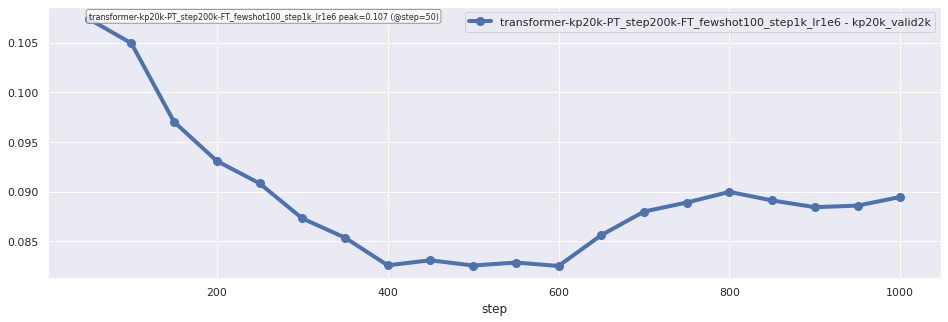

transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr3e5 20
kp20k_valid2k_test 20


416    50
Name: step, dtype: int64

/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr3e5/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_50-data_kp20k_valid2k_test.pred


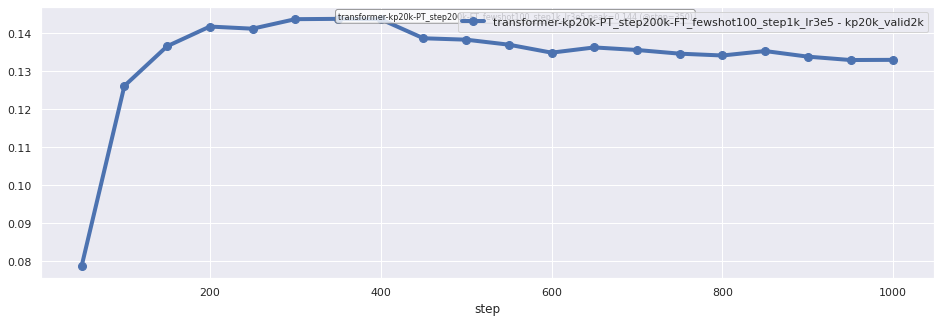

transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr5e5 20
kp20k_valid2k_test 20


436    50
Name: step, dtype: int64

/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr5e5/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_50-data_kp20k_valid2k_test.pred


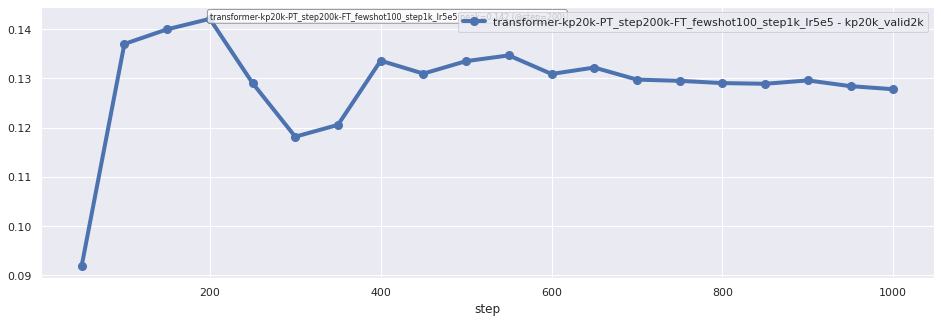

transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr5e6 20
kp20k_valid2k_test 20


457    100
458    150
Name: step, dtype: int64

/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr5e6/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_100-data_kp20k_valid2k_test.pred
/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot100_step1k_lr5e6/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_150-data_kp20k_valid2k_test.pred


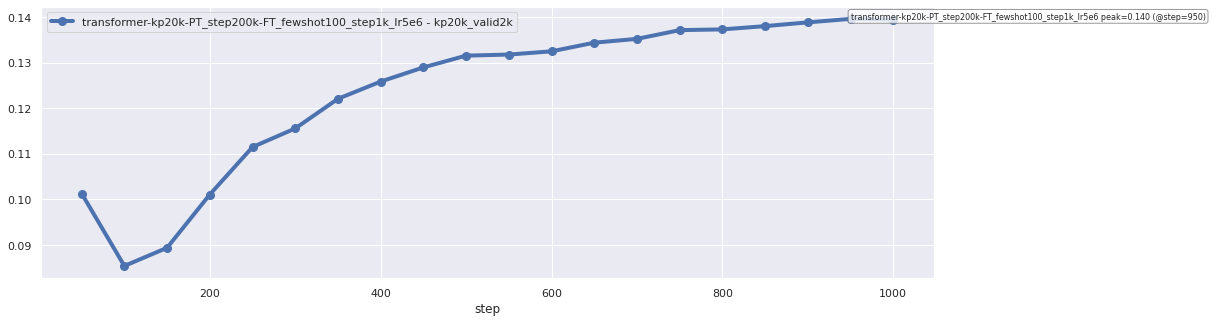

transformer-kp20k-PT_step200k-FT_fewshot10k_step4k_lr1e5 20
kp20k_valid2k_test 20


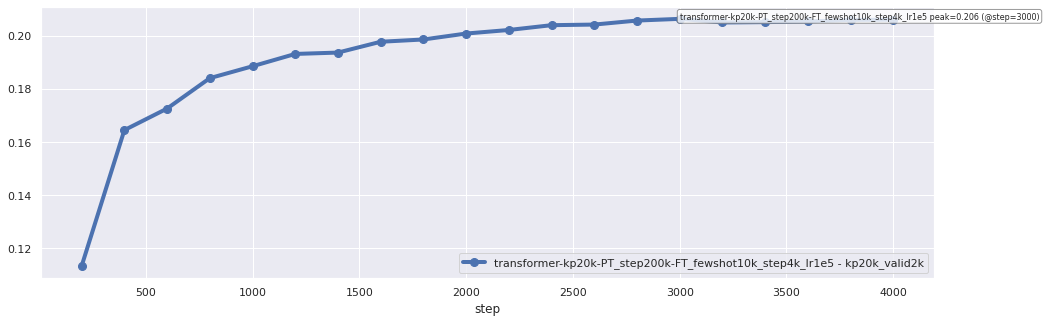

transformer-kp20k-PT_step200k-FT_fewshot1k_step2k_lr1e5 20
kp20k_valid2k_test 20


496    100
Name: step, dtype: int64

/zfs1/pbrusilovsky/rum20/kp/transfer_exps/kp_transformer_fewshot_v2/transformer-kp20k-PT_step200k-FT_fewshot1k_step2k_lr1e5/outputs/beamsearch-width_50-maxlen_40/pred/checkpoint_step_100-data_kp20k_valid2k_test.pred


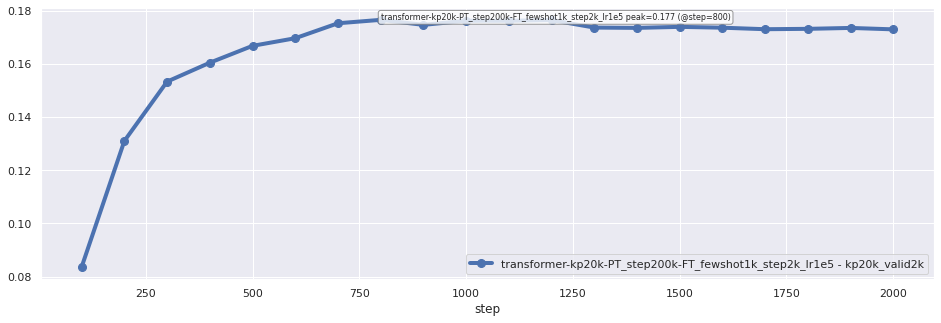

transformer-kp20k-PT_step200k-FT_full_step20k-lr1e5-warmup2k 20
kp20k_valid2k_test 20


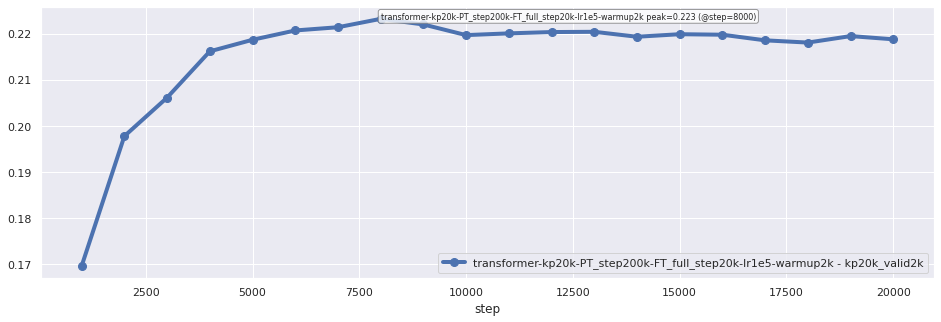

In [10]:
dataset_groups = [
    ['kp20k', 'kp20k_test', 'kp20k_valid2k_test'],
#     ['kp20k', 'duc_test'],
#     ['openkp', 'openkp_test', 'openkp_valid2k_test'],
#     ['openkp', 'duc_test']
#     ['kptimes', 'kptimes_test', 'kptimes_valid2k_test', 'jptimes_test'],
#     ['kptimes', 'duc_test']
#     ['stackex', 'stackex_test', 'stackex_valid2k_test'],
#     ['stackex', 'duc_test']
#     ['duc_test']
]

for dataset_group in dataset_groups:
    data_grps = kp_df.loc[kp_df.test_dataset.isin(dataset_group)]
    data_grps = data_grps.sort_values(by='step', ascending=True)
    print(len(data_grps))

    anchor_metric_name = 'all_exact_f_score@k'
    peak_box_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.8)
    
    print(len(data_grps))
    for exp_name, exp_grp in data_grps.groupby(['exp_name']):
        if dataset_group[0] not in exp_name and dataset_group[0] != 'duc_test':
            continue
        
        fig, ax = plt.subplots(figsize=(16,5))
    
        print(exp_name, len(exp_grp))
        for test_dataset, data_grp in exp_grp.groupby(['test_dataset']): 
            print(test_dataset, len(data_grp))
            peak_x, peak_y = peak_index(data_grp, x_index='step', y_index=anchor_metric_name)
            ax.annotate('%s peak=%.3f (@step=%d)' % (exp_name, peak_y, peak_x), xy=(peak_x, peak_y), textcoords='data', size=8, bbox=peak_box_props)
            ax = data_grp.plot(ax=ax, kind='line', x='step', y=anchor_metric_name, label=exp_name+' - '+test_dataset[:-5], style='-o', markersize=8.0, linewidth=4)

            threshold = 0.1 # kp20k=0.1, openkp=0.2, kptimes=0.25, stackex=0.3, duc=0.06
            if len(data_grp[data_grp[anchor_metric_name] < threshold]) > 0:
                display(data_grp[data_grp[anchor_metric_name] < threshold]['step'])
                for pred_path in data_grp[data_grp[anchor_metric_name] < threshold]['pred_file_path']:
                    eval_path = pred_path[:-4] + 'spacyeval'
                    report_path = pred_path[:-4] + 'report'
                    
                    if os.path.exists(pred_path):  
                        print(pred_path)
#                         os.remove(pred_path)
#                     if os.path.exists(eval_path):  
#                         print(eval_path)
#                         os.remove(eval_path)
#                     if os.path.exists(report_path):  
#                         print(report_path)
#                         os.remove(report_path)
                    
    #         display(grp)
    
        plt.legend(loc='best')
        plt.show()
    
    break



### Delete problematic pred/eval

In [11]:
dataset_groups = [
    ['kp20k', 'kp20k_test', 'kp20k_valid2k_test'],
#     ['openkp', 'openkp_test', 'openkp_valid2k_test', 'duc_test'],
#     ['kptimes', 'kptimes_test', 'kptimes_valid2k_test', 'jptimes_test', 'duc_test'],
#     ['stackex', 'stackex_test', 'stackex_valid2k_test'],
]

for dataset_group in dataset_groups:
    data_grps = kp_df.loc[kp_df.test_dataset.isin(dataset_group)]
    data_grps = data_grps.sort_values(by='step', ascending=True)
    print(len(data_grps))

    anchor_metric_name = 'all_exact_f_score@k'
    
    for exp_name, exp_grp in data_grps.groupby(['exp_name']):
        
        print(exp_name, len(exp_grp))
        for test_dataset, data_grp in exp_grp.groupby(['test_dataset']): 
            print(test_dataset, len(data_grp))
            
            if len(data_grp[data_grp[anchor_metric_name] < 0.1]):
                display(data_grp[data_grp[anchor_metric_name] < 0.1])

        break



460
bart_presabs_kp20k_fewshot100 22
kp20k_test 10


,#ab_doc,#ab_pred,#ab_tgt,#beam,#beamstep,#doc,#dup_pred,#pre_doc,#pre_pred,#pre_tgt,...,present_partial_precision_hard@M,present_partial_precision_hard@k,present_partial_recall@1,present_partial_recall@10,present_partial_recall@3,present_partial_recall@5,present_partial_recall@M,present_partial_recall@k,step,test_dataset
0,16637,36.230150,1.987292,55.312053,2157.181768,19987,122.938710,18989,1.233152,3.275179,...,0.053823,0.028991,0.018529,0.036002,0.032030,0.035037,0.036026,0.028991,200,kp20k_test
4,16637,107.204283,1.987292,257.056136,8689.528243,19987,2083.173863,18989,7.714164,3.275179,...,0.101193,0.118781,0.053389,0.224639,0.128430,0.175775,0.230663,0.118781,900,kp20k_test
5,16637,107.275979,1.987292,251.395207,8645.629759,19987,2137.247561,18989,7.733277,3.275179,...,0.101692,0.118378,0.052101,0.224919,0.127971,0.176442,0.229821,0.118378,1100,kp20k_test
6,16637,116.085556,1.987292,266.844649,9022.422274,19987,2128.525392,18989,7.515135,3.275179,...,0.102611,0.117059,0.051837,0.219297,0.125725,0.173609,0.223735,0.117059,1600,kp20k_test
9,16637,58.192925,1.987292,107.973683,3925.345324,19987,619.078501,18989,1.090609,3.275179,...,0.064991,0.031534,0.022436,0.035021,0.033784,0.034912,0.035021,0.031534,1800,kp20k_test


kp20k_valid2k_test 12


,#ab_doc,#ab_pred,#ab_tgt,#beam,#beamstep,#doc,#dup_pred,#pre_doc,#pre_pred,#pre_tgt,...,present_partial_precision_hard@M,present_partial_precision_hard@k,present_partial_recall@1,present_partial_recall@10,present_partial_recall@3,present_partial_recall@5,present_partial_recall@M,present_partial_recall@k,step,test_dataset
4,1671,107.5235,2.0025,256.6530,8679.4840,2000,2089.9670,1895,7.7045,3.2625,...,0.102567,0.120510,0.053238,0.227533,0.126723,0.176313,0.233133,0.120510,900,kp20k_valid2k_test
5,1671,109.2775,2.0025,252.5100,8682.7465,2000,2160.0810,1895,7.6785,3.2625,...,0.101695,0.120038,0.051983,0.227052,0.129137,0.178667,0.231937,0.120038,1100,kp20k_valid2k_test
7,1671,115.3735,2.0025,266.1735,8992.7490,2000,2132.1625,1895,7.5090,3.2625,...,0.100634,0.118080,0.053482,0.218367,0.127855,0.172713,0.223205,0.118080,1600,kp20k_valid2k_test


### Others

In [ ]:

kp_df = None

train_test_mappings = {
    'kp20k': ['kp20k', 'kp20k_valid2k', 'inspec', 'krapivin', 'semeval', 'nus', 'duc'],
#     'openkp': ['openkp', 'openkp_valid2k', 'duc'],
#     'kptimes': ['kptimes', 'kptimes_valid2k', 'jptimes', 'duc'],
#     'stackex': ['stackex', 'stackex_valid2k', 'duc'],
}
test_train_mappings = {}
for train, tests in train_test_mappings.items():
    for test in tests:
        test_train_mappings[test] = train

for fname in os.listdir(report_dir):
    if not fname.endswith('.spacy.csv'): continue
    kp_df = pd.read_csv(os.path.join(report_dir, fname))
    kp_df = kp_df.loc[kp_df.pred_name == pred_name]
    kp_df = kp_df.sort_values(by='step', ascending=True)

    test_dataset_name = fname[: fname.find('_test')]
    corr_train_name = test_train_mappings[test_dataset_name]
    exp_names = kp_df.exp_name.unique()
    
#     print(fname)
    print(test_dataset_name)
    print(corr_train_name)
#     print(len(kp_df))
#     print(kp_df.columns)
#     [print(c) for c in kp_df.columns]
#     print(kp_df.exp_name.unique())

    anchor_metric_name = 'all_exact_f_score@k'

    plot_testing_curve(kp_df, y_index=anchor_metric_name, title='fewshot curve, '+ anchor_metric_name)

### Plot One2Seq (beam_width=50) hard metrics

/ihome/hdaqing/rum20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning: `item` has been deprecated and will be removed in a future version


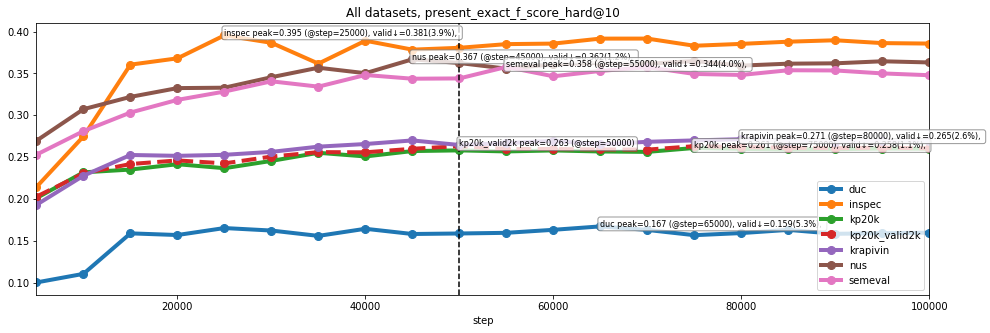

/ihome/hdaqing/rum20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/ihome/hdaqing/rum20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in double_scalars


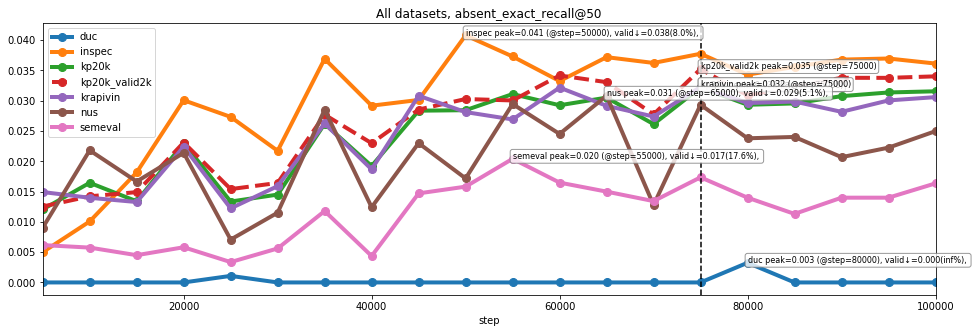

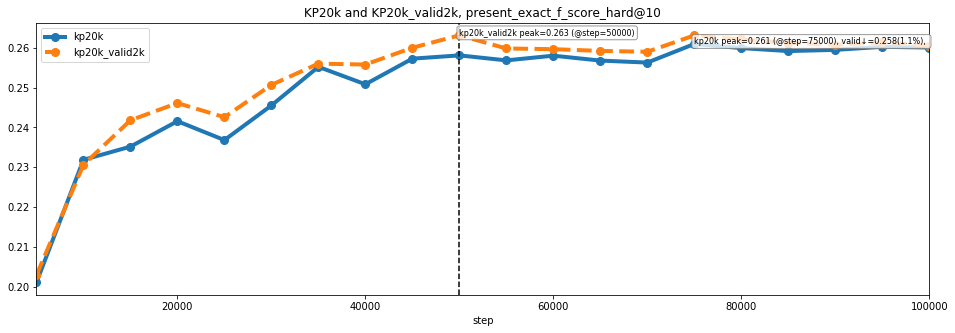

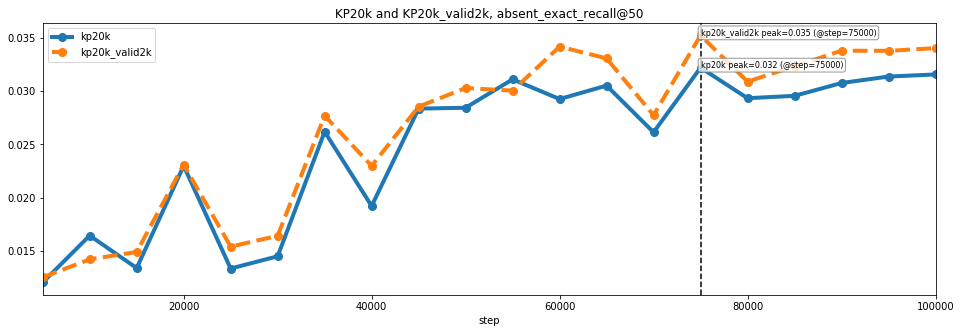

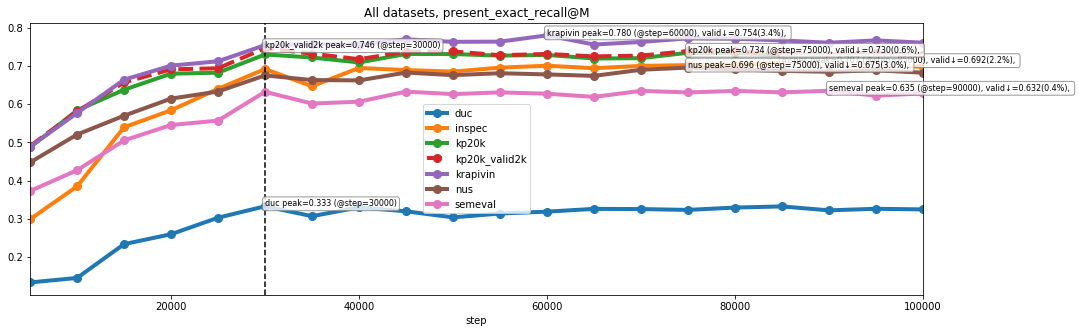

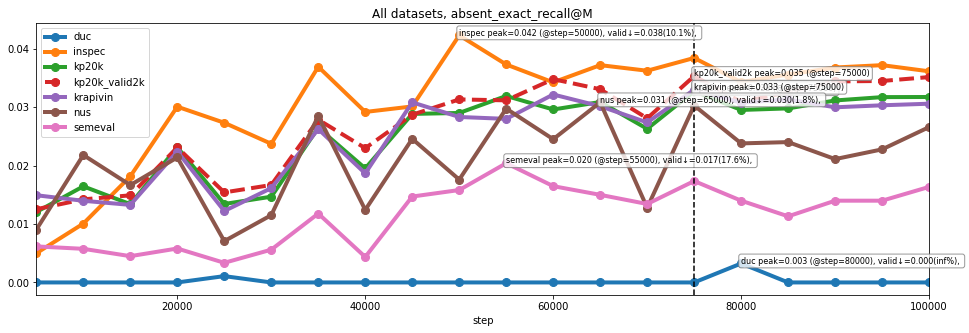

In [11]:
exp_eval_df = all_eval_df.loc[all_eval_df['exp_name'] == 'kp20k-meng17-verbatim_append-rnn-BS64-LR0.05-Layer1-Dim150-Emb100-Dropout0.0-Copytrue-Reusetrue-Covtrue-PEfalse-Contboth-IF1']
# exp_eval_df = all_eval_df.loc[all_eval_df['exp_name'] == 'kp20k-meng17-verbatim_append-rnn-BS64-OPTadagrad-LR0.05-Layer1-Dim150-Emb100-Dropout0.0-Copyfalse']

# print(exp_eval_df.shape)
# print(exp_eval_df.test_dataset.value_counts())
# print(exp_eval_df.step.value_counts())

exp_eval_df = exp_eval_df.sort_values(by='step', ascending=True)
exp_eval_df = exp_eval_df.loc[exp_eval_df.beam_width == '50']
exp_eval_df = exp_eval_df.loc[exp_eval_df.decoding_terminate == 'fullbeam'] # topbeamends/fullbeam
exp_eval_df = exp_eval_df.loc[exp_eval_df.decoding_method == 'exhaustive'] # exhaustive/selfterminating


# print(exp_eval_df.decoding_terminate.value_counts())
# print(exp_eval_df.shape)
# display(exp_eval_df)
# print(exp_eval_df.path.unique())
# exp_eval_df = exp_eval_df.loc[exp_eval_df.step % 10000 == 0] # keep % 10000
# exp_eval_df = exp_eval_df.loc[(exp_eval_df.step % 10000 == 4000) | (exp_eval_df.step % 5000 == 0)] # keep % 10000 and 5000

# plot 7 datasets
plot_testing_curve(exp_eval_df, y_index='present_exact_f_score_hard@10', title='All datasets, present_exact_f_score_hard@10')
# plot_testing_curve(exp_eval_df, y_index='present_exact_precision_hard@10', title='All datasets, present_exact_precision_hard@10')
# plot_testing_curve(exp_eval_df, y_index='present_exact_recall@10', title='All datasets, present_exact_recall@10')
plot_testing_curve(exp_eval_df, y_index='absent_exact_recall@50', title='All datasets, absent_exact_recall@50')

# plot kp20k and kp20k_valid2k
kp20k_eval_df = exp_eval_df[exp_eval_df.test_dataset.str.startswith('kp20k')]
plot_testing_curve(kp20k_eval_df, y_index='present_exact_f_score_hard@10', title='KP20k and KP20k_valid2k, present_exact_f_score_hard@10')
plot_testing_curve(kp20k_eval_df, y_index='absent_exact_recall@50', title='KP20k and KP20k_valid2k, absent_exact_recall@50')

# plot recall@M
plot_testing_curve(exp_eval_df, y_index='present_exact_recall@M', title='All datasets, present_exact_recall@M')
plot_testing_curve(exp_eval_df, y_index='absent_exact_recall@M', title='All datasets, absent_exact_recall@M')
# plot_testing_curve(exp_eval_df, y_index='unique_pred_num', title='All datasets, unique_pred_num')



# plot_testing_curve(exp_eval_df, y_index='present_exact_advanced_sadr', title='All datasets, present_exact_advanced_sadr')
# plot_testing_curve(exp_eval_df, y_index='absent_exact_advanced_sadr', title='All datasets, absent_exact_advanced_sadr')
# plot_testing_curve(exp_eval_df, y_index='present_exact_advanced_auc', title='All datasets, present_exact_advanced_auc')
# plot_testing_curve(exp_eval_df, y_index='absent_exact_advanced_auc', title='All datasets, absent_exact_advanced_auc')

